<a href="https://colab.research.google.com/github/JCMeyerM/DinamicaIntraEntreHuespedes/blob/main/Graficas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simulaciones del acoplamiento de la dinámica intra huésped y entre huéspedes

En este notebook de google colab de podrán ejecutar las mismas simulaciones presentadas en mi tesis de titulación y también se pueden modificar los parámetros en caso de querer simular diferentes escenarios.

Para utilizar todas las funciones necesarias es necesario importar algunas paqueterìas, asì como dos scripts de python llamados `config.py` y  `funciones.py`.

Para cargar estos módulos y ejecutar el notebook desde Google Colab es posible hacerlo de las siguientes dos formas:


1.   Copiar los scripts `config.py` y `funciones.py` en una carpeta de Google Drive e importarlos como se mostrará más adelante en el código.
2.   Cargar los scripts `config.py` y `funciones.py` en el entorno de Google Colab cada vez que se requiera hacer una ejecución.








In [ ]:
## Permitir a google colab acceder a carpeta de google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Establecer la ruta donde se encuentran los scripts de funciones y config
import sys
sys.path.append("/content/drive/MyDrive/tesis/dengue/simulaciones")
import funciones as fs
import config as conf


In [ ]:
## Si se realizan cambios en config o funciones, se pueden volver a cargar sin necesidad de reiniciar el kernel
import importlib

importlib.reload(fs)

<module 'funciones' from '/content/drive/MyDrive/tesis/dengue/simulaciones/funciones.py'>

In [ ]:
importlib.reload(conf)

<module 'config' from '/content/drive/MyDrive/tesis/dengue/simulaciones/config.py'>

### Paqueterías necesarias

In [ ]:
import scipy.integrate as spi
import numpy as np
import pylab as pl
import matplotlib.pyplot as plt
from matplotlib import rc
import matplotlib.gridspec as gridspec
import cmath
import math
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D


In [ ]:
import scipy
print(scipy.__version__)

1.11.4


In [ ]:
import random

random.seed(182)

# Dinámica intra huésped y entre huéspedes

El modelo estudiado es el siguiente:

\begin{equation}
    \begin{aligned}
        I' &=\alpha q (1-I)Y-(\mu+\gamma)I ,\\
        Y' &=\beta(1-Y)I-\delta Y , \\
        T' &=\Lambda-kVT-mT , \\
        W' &=kVT-dW  , \\
        V' &=pW-cV+g(Y) .
    \end{aligned}
\end{equation}

## Cálculo de puntos de equilibrio y número básico de reproducción

In [ ]:
print("----------------------------")
print("----------------------------")
print("R0 y Eq ")
print("----------------------------")
print("----------------------------")

miu = conf.param_det["miu"]
q = conf.param_det["q"]
a = conf.param_det["a"]
b = conf.param_det["b"]
g = conf.param_det["g"]
r = conf.param_det["r"]
l = conf.param_det["l"]
m = conf.param_det["m"]
d = conf.param_det["d"]
k = conf.param_det["k"]
p = conf.param_det["p"]
c = conf.param_det["c"]

Y_ = conf.Y_graf

T0 = fs.T0_(lambda_may = l,m = m)
Rv0_value = fs.Rv0_fun(T0,k,p,c,m,d)
a1 = fs.calculate_a1(r * Y_, m = m, d = d, p = p, T0 = T0, Rv0 = Rv0_value)
a2 = fs.calculate_a2(T0 = T0, Rv0 = Rv0_value)
T_minus = fs.T_tilde_minus( a1, a2)

RVE = fs.RvE(T0,T_minus)

Veq = fs.calculate_Vte(c = c, g = r * Y_, p = p, Lambd = l, m = m, d = d, Rv = RVE)

weq = fs.calculate_Wte(Lambd = l, m = m, d = d, Rv = RVE)
print("intra huespedes:")
print("T0",T0)
print("Rv0", Rv0_value)
print("Rv(Y)",RVE)
print("Teq",T_minus)
print("Weq",weq)
print("Veq",Veq)


Rdo= fs.Rdo_calc(alpha = a, q = q, beta = a, delta = d, mu = miu, gamma = g)
Ieq = fs.Iti(Rdo = Rdo, alpha = a, q = q, mu = miu, gamma = g)
Yeq = fs.Yti(Rdo = Rdo, delta = d, beta = a)

print("entre huespedes:")
print("Rdo",Rdo)
print("Ieq",Ieq)
print("Yeq",Yeq)


print("----------------------------")
print("----------------------------")
print("R0 y Eq con Y en equilibrio ")

T0 = fs.T0_(lambda_may = l,m = m)
Rv0_value = fs.Rv0_fun(T0,k,p,c,m,d)
a1 = fs.calculate_a1(r * Yeq, m = m, d = d, p = p, T0 = T0, Rv0 = Rv0_value)
a2 = fs.calculate_a2(T0 = T0, Rv0 = Rv0_value)
T_minus = fs.T_tilde_minus( a1, a2)

RVE = fs.RvE(T0,T_minus)

Veq = fs.calculate_Vte(c = c, g = r * Yeq, p = p, Lambd = l, m = m, d = d, Rv = RVE)

weq = fs.calculate_Wte(Lambd = l, m = m, d = d, Rv = RVE)
print("intra huespedes:")
print("T0",T0)
print("Rv0", Rv0_value)
print("Rv(Y)",RVE)
print("Teq",T_minus)
print("Weq",weq)
print("Veq",Veq)



----------------------------
----------------------------
R0 y Eq 
----------------------------
----------------------------
intra huespedes:
T0 33333.333333333336
Rv0 42.13333333333334
Rv(Y) 42.13333469908161
Teq 791.1392148616214
Weq 19525.316471083028
Veq 61700002.04862237
entre huespedes:
Rdo 1.5734095936977281
Ieq 0.30220654285838755
Yeq 0.08918261161463577
----------------------------
----------------------------
R0 y Eq con Y en equilibrio 
intra huespedes:
T0 33333.333333333336
Rv0 42.13333333333334
Rv(Y) 42.13334551343274
Teq 791.1390118001946
Weq 19525.316592919884
Veq 61700018.270149164


## Parámetros y reescalamiento para simulación determinística

In [ ]:
## parámetros simulación determinista
miu = conf.param_det["miu"]
q = conf.param_det["q"]
a = conf.param_det["a"]
b = conf.param_det["b"]
dy = conf.param_det["dy"]
g = conf.param_det["g"]
r = conf.param_det["r"]
l = conf.param_det["l"]
m = conf.param_det["m"]
d = conf.param_det["d"]
k = conf.param_det["k"]
p = conf.param_det["p"]
c = conf.param_det["c"]

#constantes de escalamiento
Y0 = conf.param_scale_det_0["Y0"]
I0 = conf.param_scale_det_0["I0"]
w0 = conf.param_scale_det_0["W0"]
T_0 = conf.param_scale_det_0["T0"]
v0 = conf.param_scale_det_0["V0"]
tscale = conf.param_scale_det_0["tscale"]

print("parámetros originales : " , conf.param_det )
print("constantes para cambio de escala : ",conf.param_stoch )

print(" t scale", tscale)
param_scale_d = fs.escalado_den(miu = miu \
                                    ,q = q \
                                    ,a = a \
                                    ,b = b \
                                    ,g = g \
                                    ,dy = dy \
                                    ,r = r \
                                    ,l = l \
                                    ,m = m \
                                    ,d = d \
                                    ,k = k \
                                    ,p = p \
                                    ,c = c \
                                    ,Y0 = Y0 \
                                    ,I0 = I0 \
                                    ,T0 = T_0 \
                                    ,W0 = w0\
                                    ,V0 = v0 \
                                    ,t = tscale)

param_scale_d.update({"i0":I0,"y0":Y0 })


print("Validación del cambio de escala")
print("parámetros originales : " , conf.param_det )
print("parámetros reescalados : ")
## validacion de nuevos parametros
for name,p_i in param_scale_d.items():
  print("{} : {}".format(name,p_i))

# condiciones iniciales
i_ini = conf.ci_det["i_ini"]
y_ini = conf.ci_det["y_ini"]
T_ini = conf.ci_det["T_ini"]
W_ini = conf.ci_det["W_ini"]
V_ini = conf.ci_det["V_ini"]
x0=[i_ini,y_ini,T_ini,W_ini,V_ini]

i_scale = i_ini / I0
y_scale = y_ini / Y0
T_scale = T_ini / T_0
W_scale = W_ini / w0
V_scale = V_ini / v0

x0_scale = np.array([i_scale,y_scale,T_scale,W_scale,V_scale])

print("Comparación de condiciones")
print("Condición original : ", x0)
print("Condición escalada : ", x0_scale)

parámetros originales :  {'miu': 3.91e-05, 'q': 1.5, 'a': 0.162, 'b': 0.162, 'dy': 0.5, 'g': 0.05, 'r': 1000.0, 'l': 10000.0, 'm': 0.3, 'd': 0.5, 'k': 2e-07, 'p': 15800.0, 'c': 5}
constantes para cambio de escala :  {'Y0': 0.01, 'I0': 0.01, 'W0': 100.0, 'T0': 100.0, 'V0': 100.0, 'tscale': 0.5}
 t scale 0.5
t .. 0.5
Validación del cambio de escala
parámetros originales :  {'miu': 3.91e-05, 'q': 1.5, 'a': 0.162, 'b': 0.162, 'dy': 0.5, 'g': 0.05, 'r': 1000.0, 'l': 10000.0, 'm': 0.3, 'd': 0.5, 'k': 2e-07, 'p': 15800.0, 'c': 5}
parámetros reescalados : 
miu : 7.82e-05
q : 1.5
a : 0.324
b : 0.324
dy : 1.0
g : 0.1
r : 0.02
l : 2.0
m : 0.6
d : 1.0
k_T : 0.04
k_W : 0.04
k : 0.04
p : 3160.0
c : 10.0
i0 : 1
y0 : 1
Comparación de condiciones
Condición original :  [0, 0.0001, 100000, 0, 0.1]
Condición escalada :  [0.e+00 1.e-04 1.e+01 0.e+00 1.e-06]


In [ ]:

## Establecer espacio de tiempo sobre el cual se calcularán las soluciones numéricas
tend=conf.tend_det
tstep = conf.tstep_det
tobs=int(tend/tstep)
print(tobs)
timePoints=np.linspace(0,tend,tobs)


## Parámetros escalados
a,q,g,miu,b,dy,d,l,k,m,r,c,p=param_scale_d["a"]\
                                    ,param_scale_d["q"]\
                                    ,param_scale_d["g"]\
                                    ,param_scale_d["miu"]\
                                    ,param_scale_d["b"]\
                                    ,param_scale_d["dy"]\
                                    ,param_scale_d["d"]\
                                    ,param_scale_d["l"]\
                                    ,param_scale_d["k"]\
                                    ,param_scale_d["m"]\
                                    ,param_scale_d["r"]\
                                    ,param_scale_d["c"]\
                                    ,param_scale_d["p"]


## Solución numérica del sistema
solve_ipv=spi.solve_ivp(fs.Host2_0,[0,tend]\
                            ,x0_scale\
                            ,args=(a,q,g,miu,b,dy,d,l,k,m,r,c,p,I0,Y0)\
                            ,max_step = 1\
                            ,method = "BDF"\
                            ,rtol=1e-12\
                            ,atol=1e-14\
                            ,dense_output=True )

solution_ipv = solve_ipv.sol(timePoints)


800000


### Soluciones numéricas modelo 5 ecuaciones

In [ ]:

solve_ipv=spi.solve_ivp(fs.Host2_0,[0,tend],x0_scale, args=(a,q,g,miu,d,l,k,m,r,c,p,I0, Y0), max_step = 1, method = "BDF" , rtol=1e-12 , atol=1e-14,  dense_output=True ) # max_step = 1e-3

solution_ipv = solve_ipv.sol(timePoints)


#### Sol. para dinámica entre huéspedes

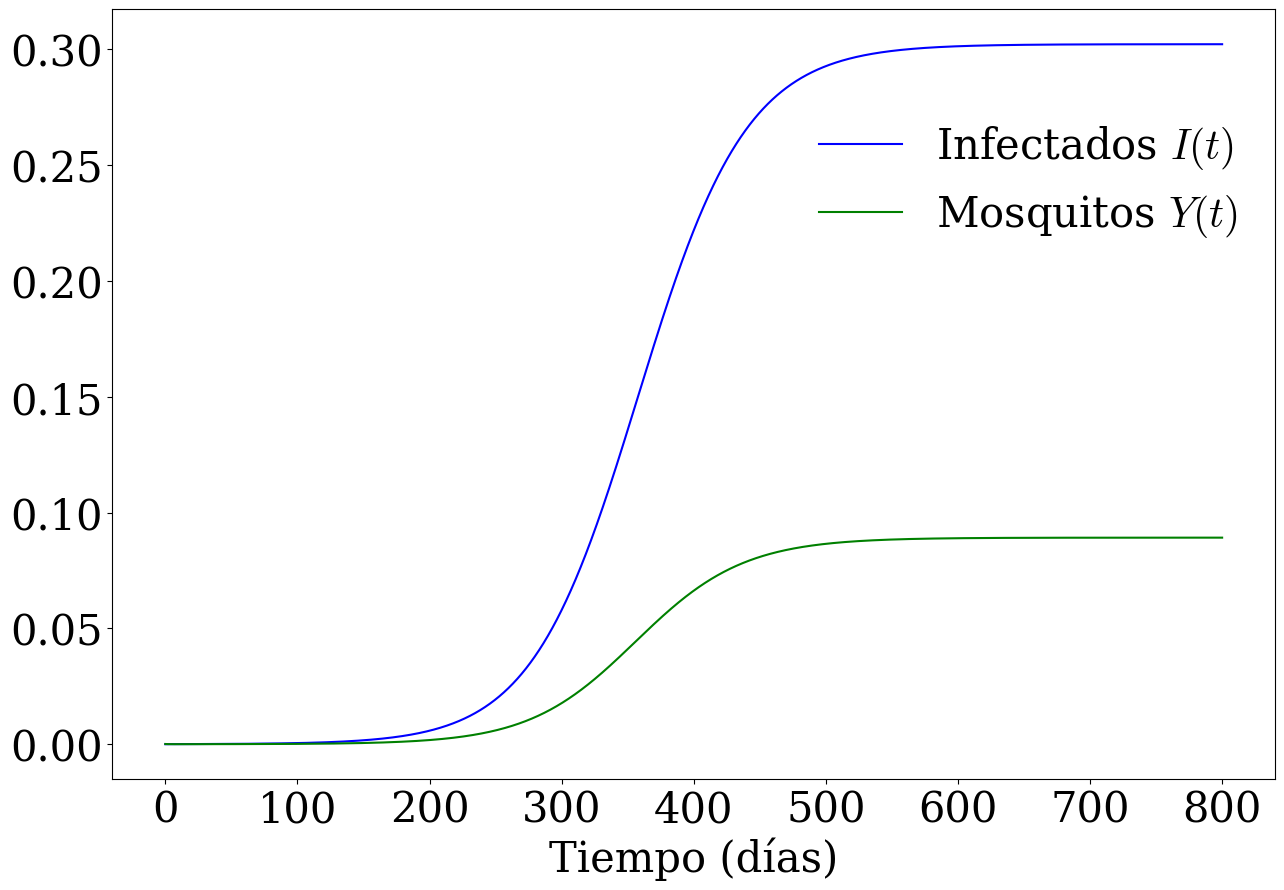

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(timePoints/tscale, solution_ipv[0 , :]*I0, color='b', label=r'Infectados $I(t)$')
ax.plot(timePoints/tscale, solution_ipv[1 , :]*Y0, color='g', label=r'Mosquitos $Y(t)$')

ax.legend(loc='upper right', bbox_to_anchor=(1, 0.9),prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'{}I_Y_vs_t_ModRoss.png'.format(conf.ruta_escritura))

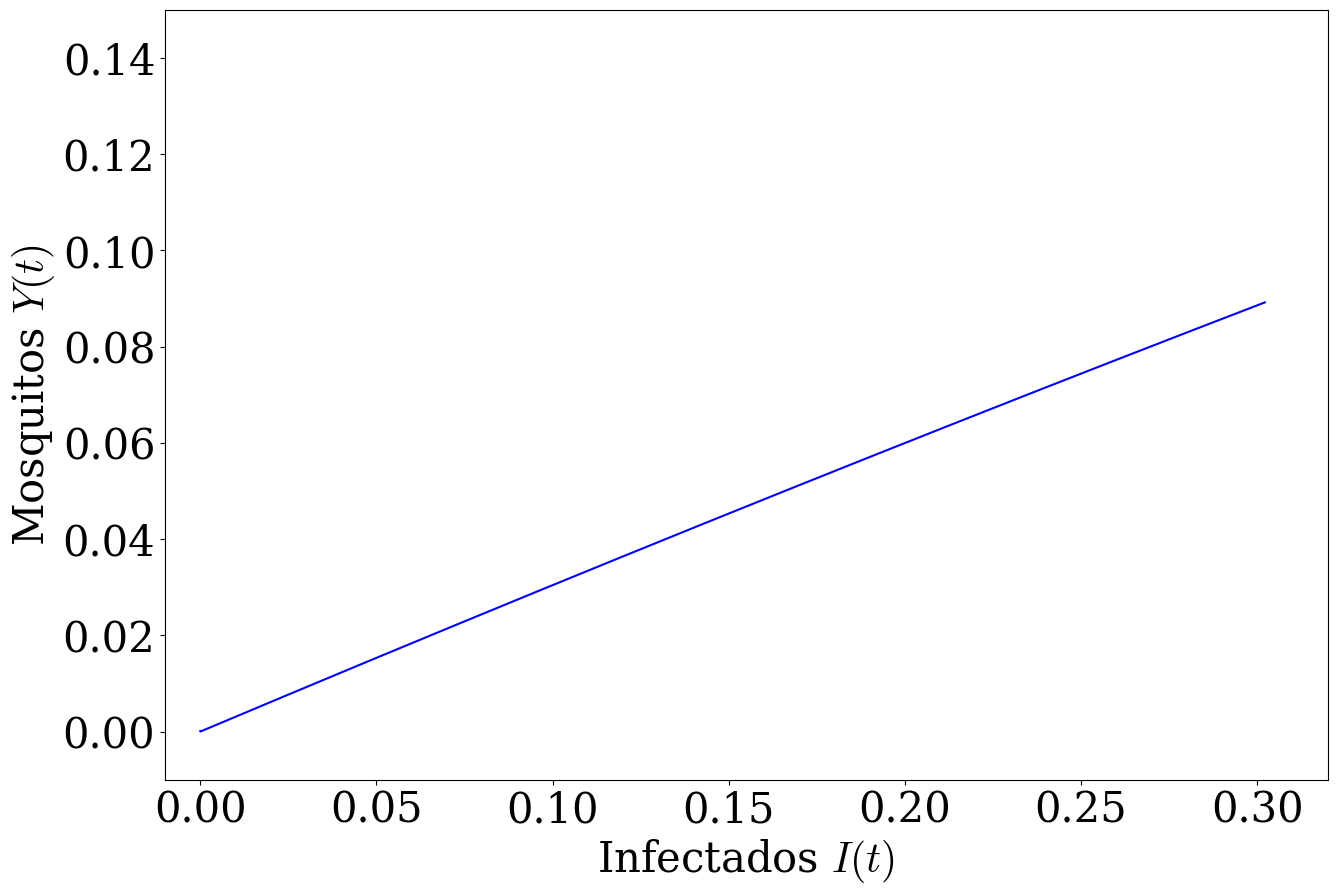

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.plot(solution_ipv[0 , :]*I0, solution_ipv[1 , :]*Y0,  color='b')
ax.set_xlim(-0.01, 0.32)
ax.set_ylim(-0.01, 0.15)
ax.set_xlabel(r'Infectados $I(t)$', fontsize=30)
ax.set_ylabel(r'Mosquitos $Y(t)$', fontsize=30)

fig.savefig(r'{}I_vs_Y_ModRoss.png'.format(conf.ruta_escritura))

#### Sol. Dinámica intra huésped

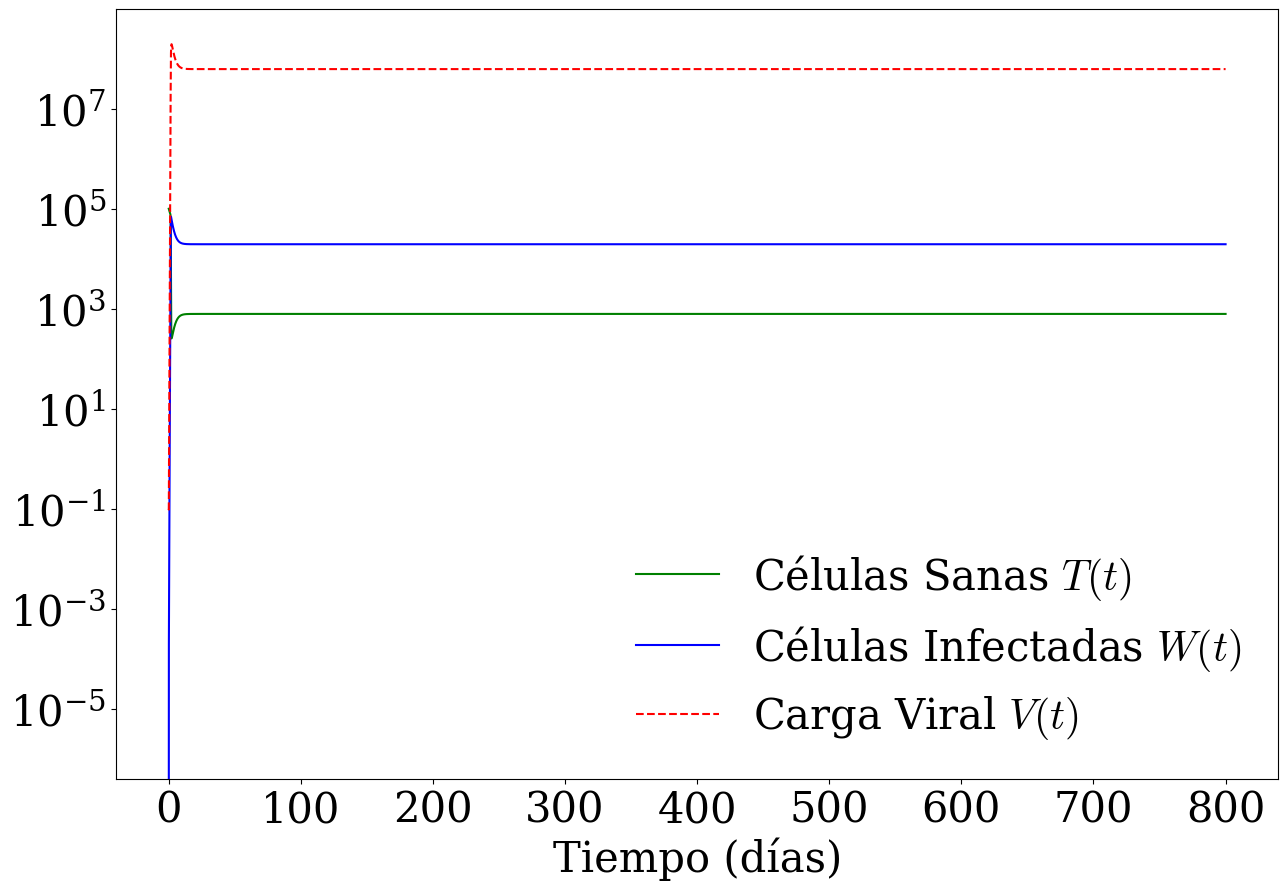

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")

ax.plot(timePoints/tscale, solution_ipv[2 , :]*T_0, color='g', ls='solid', label=r'Células Sanas $T(t)$')
ax.plot(timePoints/tscale, solution_ipv[3 , :]*w0, color='b', ls='solid', label=r'Células Infectadas $W(t)$')
ax.plot(timePoints/tscale, solution_ipv[4 , :]*v0, color='r', ls='dashed',label=r'Carga Viral $V(t)$')
ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'{}TWV_mod5ec.png'.format(conf.ruta_escritura))

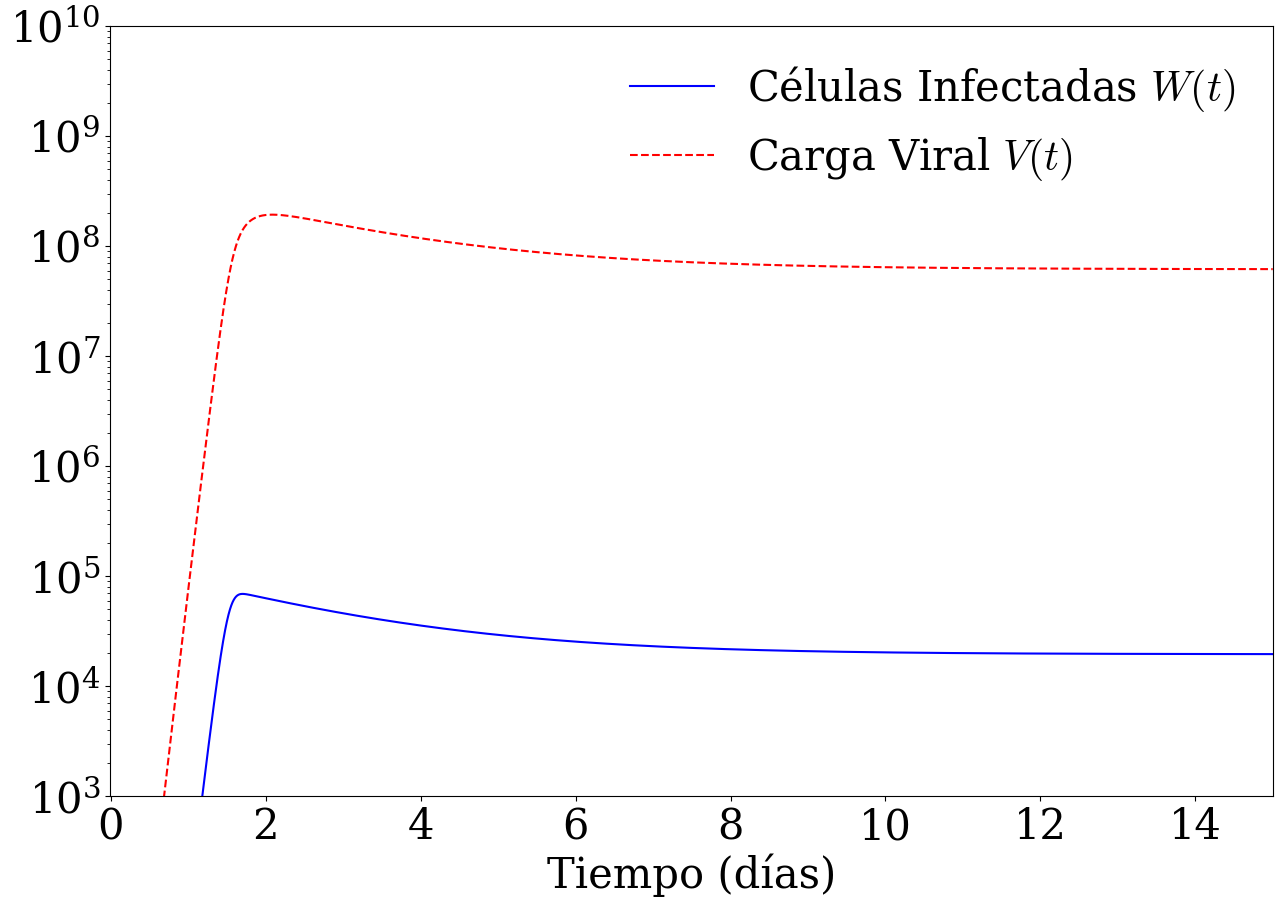

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
ax.set_xlim(-0.01, 15)
ax.set_ylim(1000, 1e10)
ax.plot(timePoints/tscale, solution_ipv[3 , :]*w0, color='b', ls='solid', label=r'Células Infectadas $W(t)$')
ax.plot(timePoints/tscale, solution_ipv[4 , :]*v0, color='r', ls='dashed',label=r'Carga Viral $V(t)$')
ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'{}WV_10dias_mod5ec.png'.format(conf.ruta_escritura))

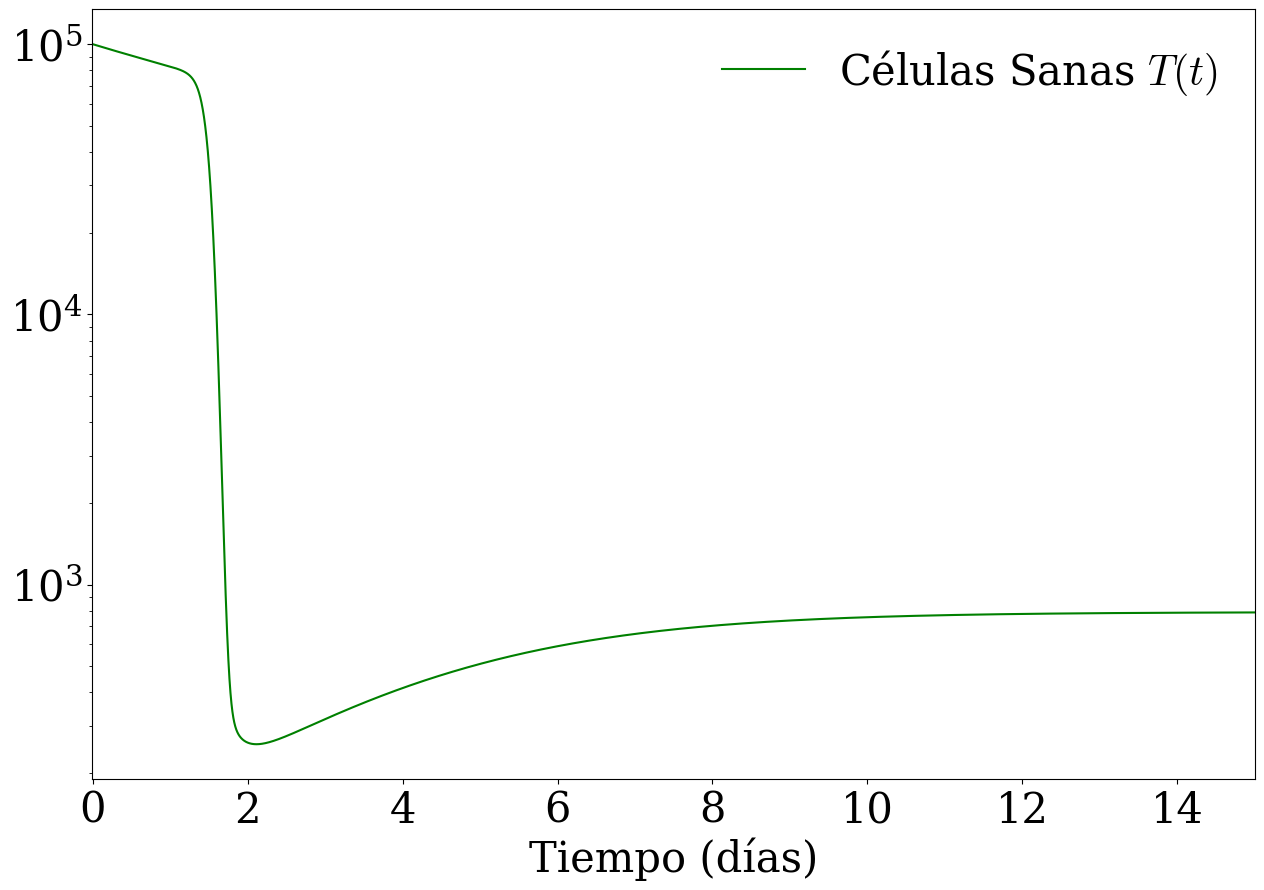

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
ax.set_xlim(-0.01, 15)
ax.plot(timePoints/tscale, solution_ipv[2 , :]*w0, color='g', ls='solid', label=r'Células Sanas $T(t)$')
ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'{}T_10dias_mod5ec.png'.format(conf.ruta_escritura))

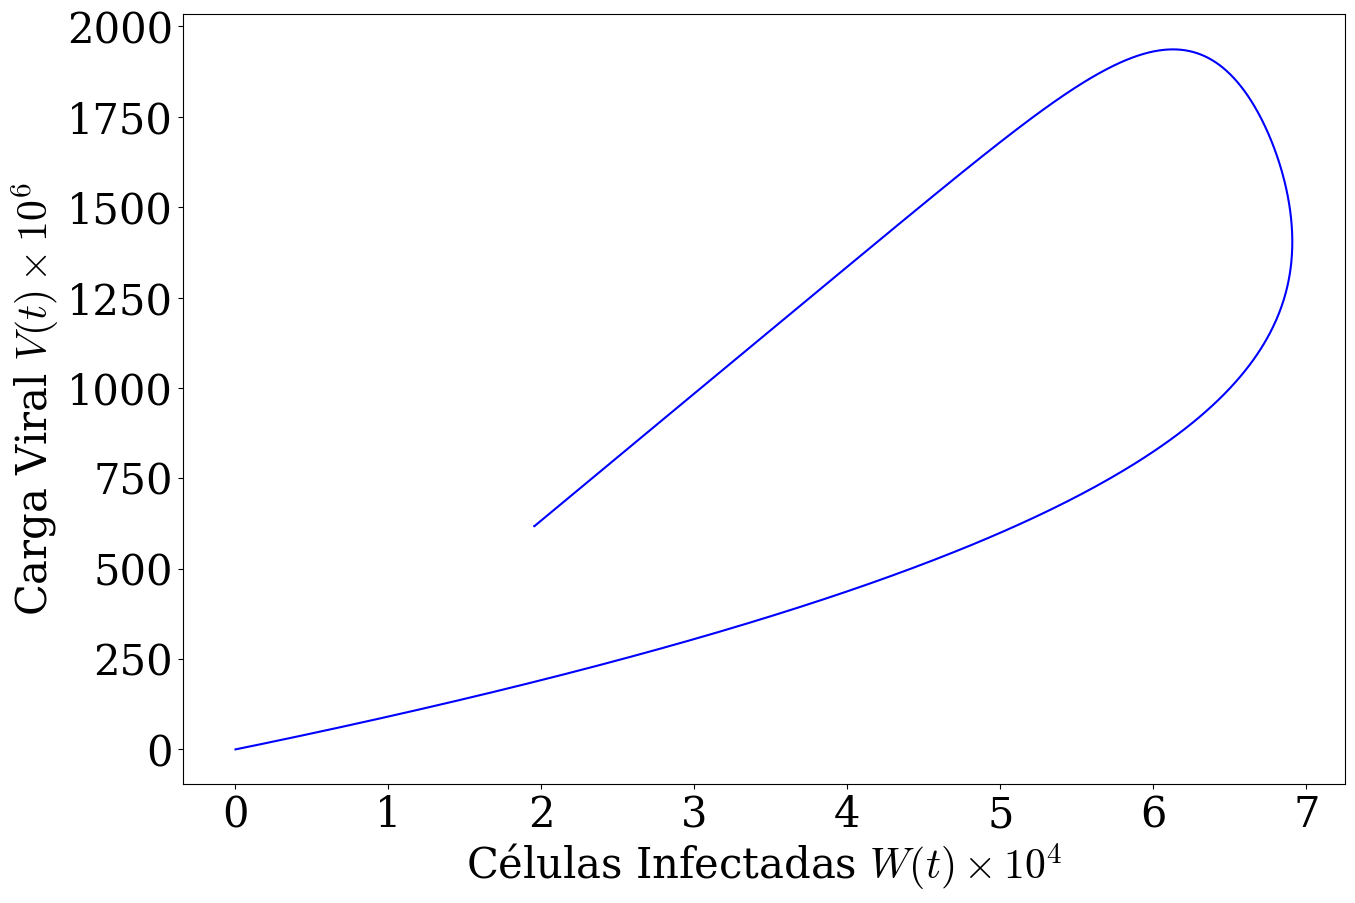

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(solution_ipv[3 , :], solution_ipv[4 , :], color='b', ls='solid')

ax.legend(loc='best',prop={'size':30},frameon=False)

ax.set_xlabel(r'Células Infectadas $W(t)\times 10^4$', fontsize=30)
ax.set_ylabel(r'Carga Viral $V(t)\times 10^6$', fontsize=30)

fig.savefig(r'{}W_vs_V_mod5ec.png'.format(conf.ruta_escritura))


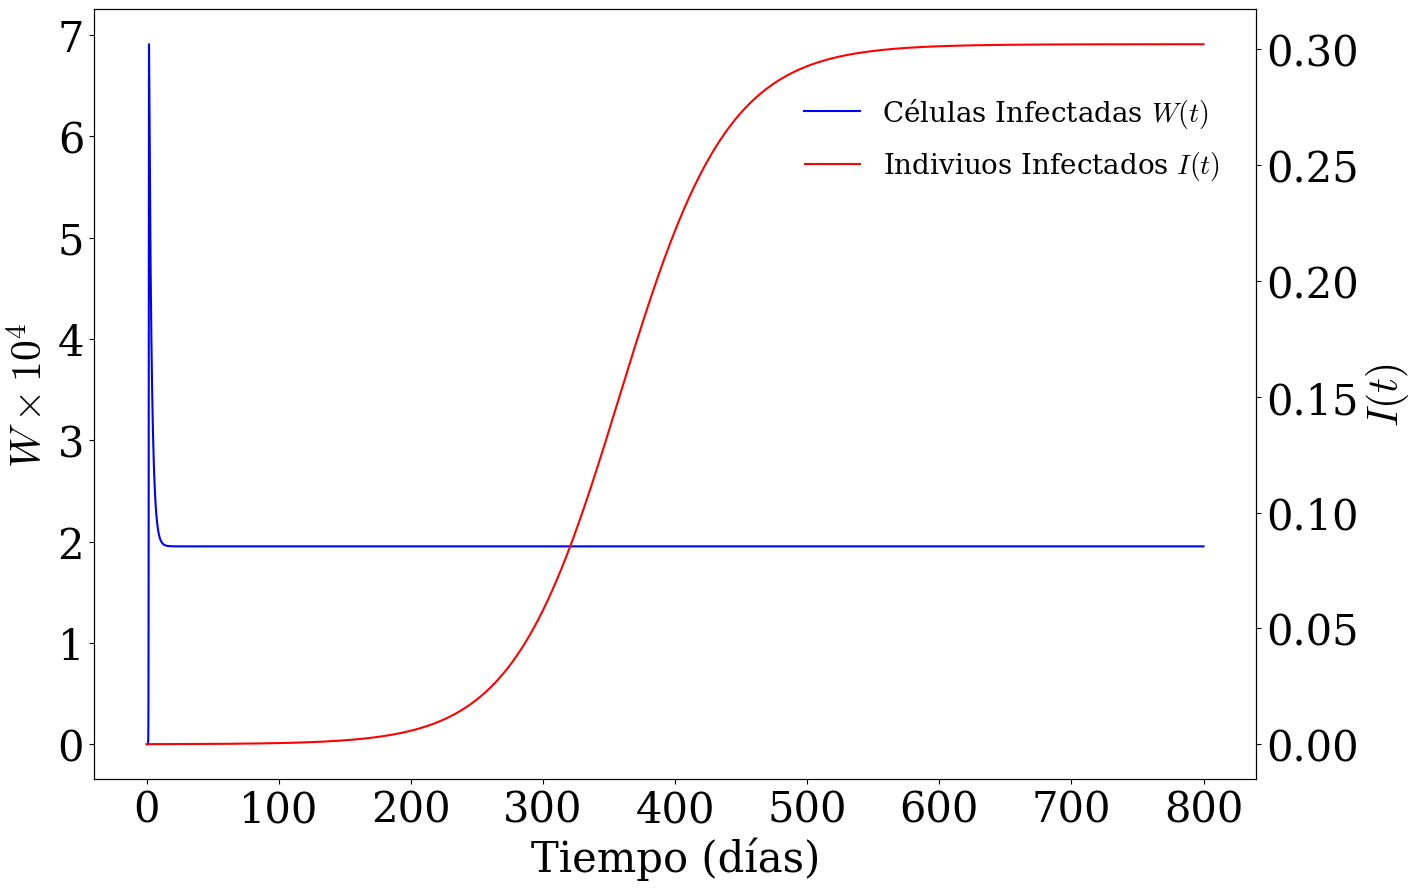

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)


fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 1, 1)

ax1.set_xlabel(r'Tiempo (días)',fontsize=30)
ax1.set_ylabel(r'$W(t) \times 10^4$',fontsize=30)
ax1.plot(timePoints/tscale, solution_ipv[3,:], color='b', ls='solid', label=r'Células Infectadas $W(t)$')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'$I(t)$',fontsize=30)
ax2.plot(timePoints/tscale, solution_ipv[0,:]*I0, color='r', ls='solid', label=r'Indiviuos Infectados $I(t)$')
ax2.tick_params(axis='y')

ax1.legend(loc='upper right', prop={'size':20} , bbox_to_anchor=(0.98, 0.92),frameon=False )
ax2.legend(loc='upper right', prop={'size':20}, bbox_to_anchor=(0.99, 0.85),frameon=False)

fig.savefig(r'{}W_I_vs_t_mod5ec.png'.format(conf.ruta_escritura))

## Tau leaping

Simulaciones estocásticas uasndo el método de $\tau$-leaping.

#### Parámetros para realiza el cambio de escala

In [ ]:
miu = conf.param_det["miu"]
q = conf.param_det["q"]
a = conf.param_det["a"]
b = conf.param_det["b"]
dy = conf.param_det["dy"]
g = conf.param_det["g"]
r = conf.param_det["r"]
l = conf.param_det["l"]
m = conf.param_det["m"]
d = conf.param_det["d"]
k = conf.param_det["k"]
p = conf.param_det["p"]
c = conf.param_det["c"]

#constantes de escalamiento
Y0 = conf.param_stoch["Y0"]
I0 = conf.param_stoch["I0"]
w0 = conf.param_stoch["w0"]
T_0 = conf.param_stoch["T_0"]
v0 = conf.param_stoch["v0"]
tscale = conf.param_stoch["tscale"]

print("parámetros originales : " , conf.param_det )
print("constantes para cambio de escala : ",conf.param_stoch )


parámetros originales :  {'miu': 3.91e-05, 'q': 1.5, 'a': 0.162, 'b': 0.162, 'dy': 0.5, 'g': 0.05, 'r': 1000.0, 'l': 10000.0, 'm': 0.3, 'd': 0.5, 'k': 2e-07, 'p': 15800.0, 'c': 5}
constantes para cambio de escala :  {'Y0': 0.01, 'I0': 0.01, 'w0': 100.0, 'T_0': 100.0, 'v0': 100.0, 'tscale': 0.5}


#### Realizar el cambio de escala

In [ ]:

print(" t scale", tscale)
param_scale = fs.escalado_den(miu = miu \
                                    ,q = q \
                                    ,a = a \
                                    ,b = b \
                                    ,g = g \
                                    ,dy = dy \
                                    ,r = r \
                                    ,l = l \
                                    ,m = m \
                                    ,d = d \
                                    ,k = k \
                                    ,p = p \
                                    ,c = c \
                                    ,Y0 = Y0 \
                                    ,I0 = I0 \
                                    ,T0 = T_0 \
                                    ,W0 = w0\
                                    ,V0 = v0 \
                                    ,t = tscale)

param_scale.update({"i0":I0,"y0":Y0 })


print("Validación del cambio de escala")
print("parámetros originales : " , conf.param_det )
print("parámetros reescalados : ")
## validacion de nuevos parametros
for name,p_i in param_scale.items():
  print("{} : {}".format(name,p_i))



 t scale 0.5
t .. 0.5
Validación del cambio de escala
parámetros originales :  {'miu': 3.91e-05, 'q': 1.5, 'a': 0.162, 'b': 0.162, 'dy': 0.5, 'g': 0.05, 'r': 1000.0, 'l': 10000.0, 'm': 0.3, 'd': 0.5, 'k': 2e-07, 'p': 15800.0, 'c': 5}
parámetros reescalados : 
miu : 7.82e-05
q : 1.5
a : 0.0032400000000000003
b : 0.0032400000000000003
dy : 1.0
g : 0.1
r : 20.0
l : 200.0
m : 0.6
d : 1.0
k_T : 3.9999999999999996e-05
k_W : 4e-05
k : 3.9999999999999996e-05
p : 31600.0
c : 10.0
i0 : 0.01
y0 : 0.01


#### Condiciones inciales para la simulación

In [ ]:
i_ini = conf.ci_stoch["i_ini"]
y_ini = conf.ci_stoch["y_ini"]
T_ini = conf.ci_stoch["T_ini"]
W_ini = conf.ci_stoch["W_ini"]
V_ini = conf.ci_stoch["V_ini"]
x0_stoch=[i_ini,y_ini,T_ini,W_ini,V_ini]

i_scale = i_ini / I0
y_scale = y_ini / Y0
T_scale = T_ini / T_0
W_scale = W_ini / w0
V_scale = V_ini / v0

x0_scale = [i_scale,y_scale,T_scale,W_scale,V_scale]

print("Comparación de condiciones")
print("Condición original : ", x0_stoch)
print("Condición escalada : ", x0_scale)

Comparación de condiciones
Condición original :  [0.1, 0.1, 33333.333333333336, 10, 10]
Condición escalada :  [10.0, 10.0, 333.33333333333337, 0.1, 0.1]


#### Simulación estocástica

In [ ]:
%%time

stoch_days = conf.stoch_days ## dias simulados
tau_step = conf.tau_step ## paso de tiempo

## Simulación estocástica para el sistema
tTime, tIA , tYA ,tTA, tWA, tVA = fs.deng_stock(INPUT = x0_scale \
                                                ,ND=stoch_days \
                                                ,tau=tau_step\
                                                ,seed_=conf.stoch_seed\
                                                ,eq_params=param_scale)

182
CPU times: user 47.8 s, sys: 854 ms, total: 48.7 s
Wall time: 49.1 s


#### Gráficas Tau leaping

##### Individuos infectados vs mosquitos

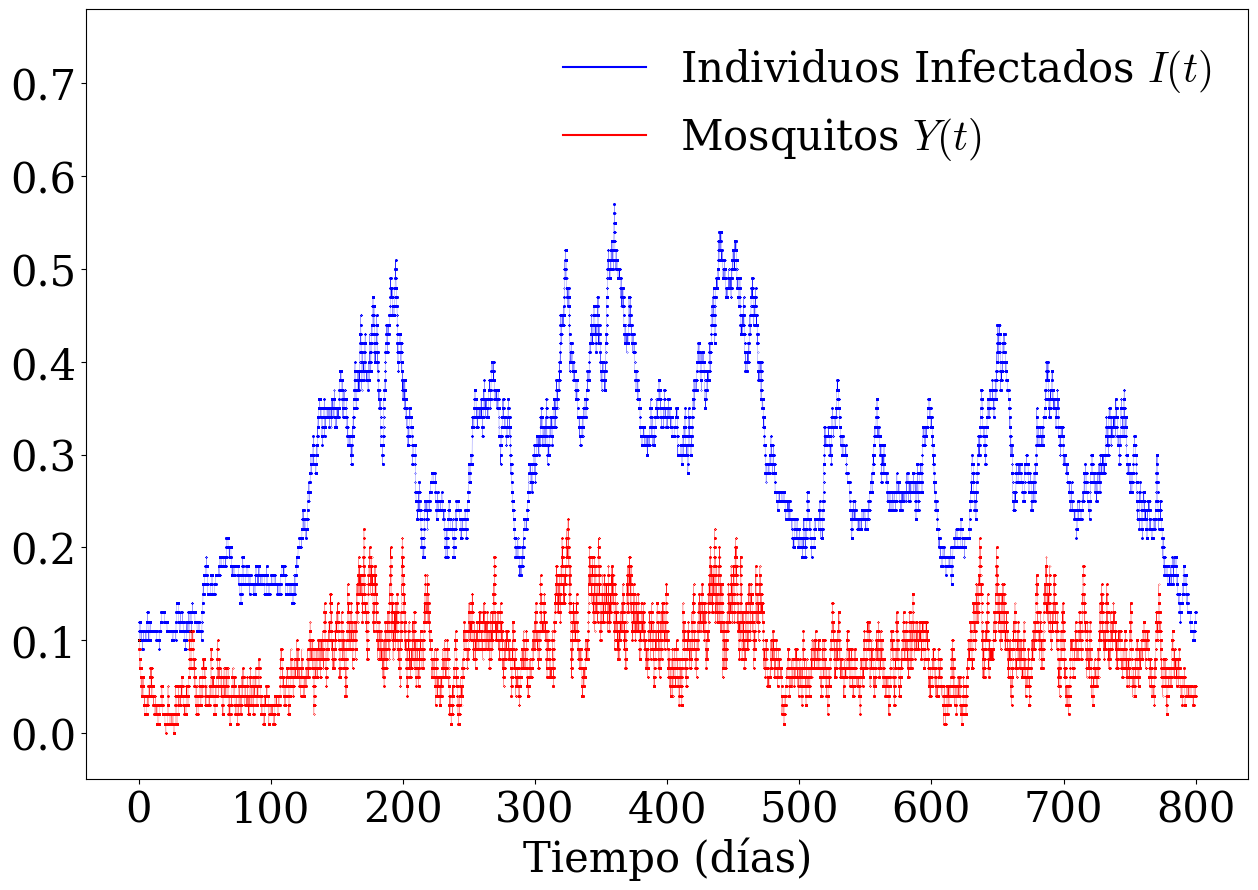

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_ylim(-0.05, 0.78)

ax.plot(tTime/tscale, tIA*I0, ".-",color='b',lw = 0.15,ms = 0.15 )#ls='-.'
ax.plot(tTime/tscale, tYA*Y0, ".-",color='r', lw = 0.15,ms = 0.15 )

ax.plot(tTime/tscale, tIA*0 -1, ls = "solid",color='b' , label=r'Individuos Infectados $I(t)$')#ls='-.'
ax.plot(tTime/tscale, tYA*0 -1, ls = "solid",color='r',label=r'Mosquitos $Y(t)$')

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'{}I_Y_vs_t_tauleap_mod5ec.png'.format(conf.ruta_escritura))

##### Células infectadas y carga viral

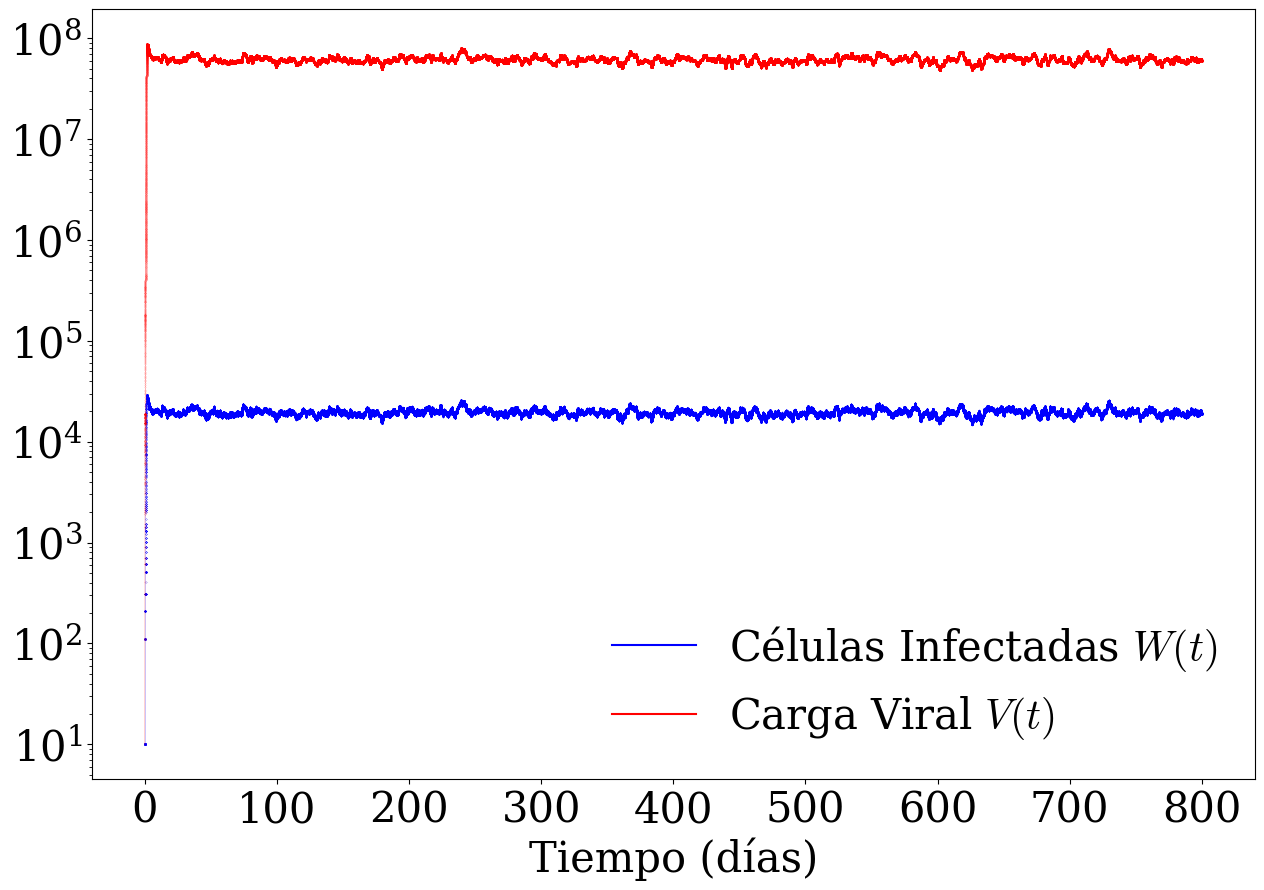

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")

ax.plot(tTime/tscale, tWA*w0, ".-",color='b',lw = 0.15,ms = 0.15 )#ls='-.'
ax.plot(tTime/tscale, tVA*v0, ".-",color='r', lw = 0.15,ms = 0.15 )

ax.plot(tTime/tscale, tWA*0 -1, ls = "solid",color='b' , label=r'Células Infectadas $W(t)$')#ls='-.'
ax.plot(tTime/tscale, tVA*0 -1, ls = "solid",color='r',label=r'Carga Viral $V(t)$')


ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'{}W_V_vs_t_tauleap_mod5ec.png'.format(conf.ruta_escritura))

##### Células sanas

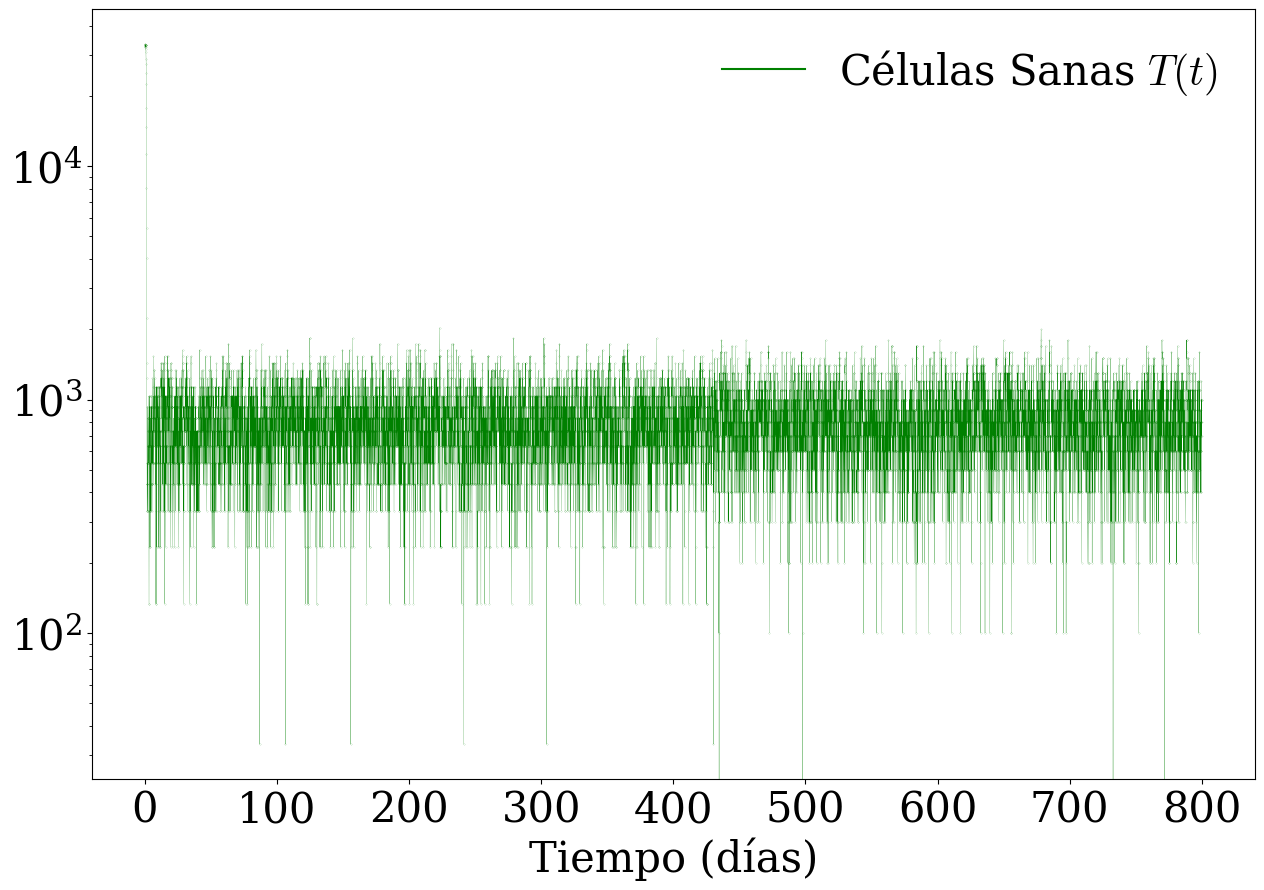

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")
indices_=list(range(1,len(tIA)+1 , 50))

ax.plot(tTime[indices_]/tscale, tTA[indices_]*T_0, ".-",color='g',lw = 0.15,ms = 0.15 )#ls='-.'

ax.plot(tTime[indices_]/tscale, tTA[indices_]*0 -1, ls = "solid",color='g' , label=r'Células Sanas $T(t)$')#ls='-.'

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'{}T_vs_t_tauleap_graf_c50_mod5ec.png'.format(conf.ruta_escritura))

## Varias simulaciones y bandas de confianza

Se realizaron varias simulaciones estocásticas y se compararon contra el resultado de la solución determinista

### Simulación determinista

In [ ]:
## parámetros simulación determinista
miu = conf.param_det["miu"]
q = conf.param_det["q"]
a = conf.param_det["a"]
b = conf.param_det["b"]
dy = conf.param_det["dy"]
g = conf.param_det["g"]
r = conf.param_det["r"]
l = conf.param_det["l"]
m = conf.param_det["m"]
d = conf.param_det["d"]
k = conf.param_det["k"]
p = conf.param_det["p"]
c = conf.param_det["c"]

#constantes de escalamiento
Y0 = conf.param_scale_det["Y0"]
I0 = conf.param_scale_det["I0"]
w0 = conf.param_scale_det["W0"]
T_0 = conf.param_scale_det["T0"]
v0 = conf.param_scale_det["V0"]
tscale = conf.param_scale_det["tscale"]

print("parámetros originales : " , conf.param_det )
print("constantes para cambio de escala : ",conf.param_stoch )

print(" t scale", tscale)
param_scale_d = fs.escalado_den(miu = miu \
                                    ,q = q \
                                    ,a = a \
                                    ,b = b \
                                    ,g = g \
                                    ,dy = dy \
                                    ,r = r \
                                    ,l = l \
                                    ,m = m \
                                    ,d = d \
                                    ,k = k \
                                    ,p = p \
                                    ,c = c \
                                    ,Y0 = Y0 \
                                    ,I0 = I0 \
                                    ,T0 = T_0 \
                                    ,W0 = w0\
                                    ,V0 = v0 \
                                    ,t = tscale)

param_scale_d.update({"i0":I0,"y0":Y0 })


print("Validación del cambio de escala")
print("parámetros originales : " , conf.param_det )
print("parámetros reescalados : ")
## validacion de nuevos parametros
for name,p_i in param_scale_d.items():
  print("{} : {}".format(name,p_i))

# condiciones iniciales
i_ini = conf.ci_stoch["i_ini"]
y_ini = conf.ci_stoch["y_ini"]
T_ini = conf.ci_stoch["T_ini"]
W_ini = conf.ci_stoch["W_ini"]
V_ini = conf.ci_stoch["V_ini"]
x0=[i_ini,y_ini,T_ini,W_ini,V_ini]

i_scale = i_ini / I0
y_scale = y_ini / Y0
T_scale = T_ini / T_0
W_scale = W_ini / w0
V_scale = V_ini / v0

x0_scale = np.array([i_scale,y_scale,T_scale,W_scale,V_scale])

print("Comparación de condiciones")
print("Condición original : ", x0)
print("Condición escalada : ", x0_scale)

parámetros originales :  {'miu': 3.91e-05, 'q': 1.5, 'a': 0.162, 'b': 0.162, 'dy': 0.5, 'g': 0.05, 'r': 1000.0, 'l': 10000.0, 'm': 0.3, 'd': 0.5, 'k': 2e-07, 'p': 15800.0, 'c': 5}
constantes para cambio de escala :  {'Y0': 0.01, 'I0': 0.01, 'W0': 100.0, 'T0': 100.0, 'V0': 100.0, 'tscale': 0.5}
 t scale 0.5
t .. 0.5
Validación del cambio de escala
parámetros originales :  {'miu': 3.91e-05, 'q': 1.5, 'a': 0.162, 'b': 0.162, 'dy': 0.5, 'g': 0.05, 'r': 1000.0, 'l': 10000.0, 'm': 0.3, 'd': 0.5, 'k': 2e-07, 'p': 15800.0, 'c': 5}
parámetros reescalados : 
miu : 7.82e-05
q : 1.5
a : 32.4
b : 32.4
dy : 1.0
g : 0.1
r : 0.02
l : 2.0
m : 0.6
d : 1.0
k_T : 0.04
k_W : 0.04
k : 0.04
p : 3160.0
c : 10.0
i0 : 100
y0 : 100
Comparación de condiciones
Condición original :  [0.1, 0.1, 33333.333333333336, 10, 10]
Condición escalada :  [1.00000000e-03 1.00000000e-03 3.33333333e+00 1.00000000e-03
 1.00000000e-04]


In [ ]:

tend=conf.stoch_days
tstep = conf.tau_step
tobs=int(tend/tstep)

timePoints=np.linspace(0,tend,tobs)
param_scale_d
a,q,g,miu,b,dy,d,l,k,m,r,c,p=param_scale_d["a"]\
                                    ,param_scale_d["q"]\
                                    ,param_scale_d["g"]\
                                    ,param_scale_d["miu"]\
                                    ,param_scale_d["b"]\
                                    ,param_scale_d["dy"]\
                                    ,param_scale_d["d"]\
                                    ,param_scale_d["l"]\
                                    ,param_scale_d["k"]\
                                    ,param_scale_d["m"]\
                                    ,param_scale_d["r"]\
                                    ,param_scale_d["c"]\
                                    ,param_scale_d["p"]
### sol determinista
solve_ipv_tau=spi.solve_ivp(fs.Host2_0,[0,tend]\
                            ,x0_scale\
                            ,args=(a,q,g,miu,b,dy,d,l,k,m,r,c,p,I0,Y0)\
                            ,max_step = 1\
                            ,method = "BDF"\
                            ,rtol=1e-12\
                            ,atol=1e-14\
                            ,dense_output=True )

solution_ipv_tau = solve_ipv_tau.sol(timePoints)


### Parámetros para simulación  estocastica

In [ ]:
miu = conf.param_det["miu"]
q = conf.param_det["q"]
a = conf.param_det["a"]
b = conf.param_det["b"]
dy = conf.param_det["dy"]
g = conf.param_det["g"]
r = conf.param_det["r"]
l = conf.param_det["l"]
m = conf.param_det["m"]
d = conf.param_det["d"]
k = conf.param_det["k"]
p = conf.param_det["p"]
c = conf.param_det["c"]

#constantes de escalamiento
Y0 = conf.param_stoch["Y0"]
I0 = conf.param_stoch["I0"]
w0 = conf.param_stoch["W0"]
T_0 = conf.param_stoch["T0"]
v0 = conf.param_stoch["V0"]
tscale = conf.param_stoch["tscale"]

print("parámetros originales : " , conf.param_det )
print("constantes para cambio de escala : ",conf.param_stoch )

print(" t scale", tscale)
param_scale = fs.escalado_den(miu = miu \
                                    ,q = q \
                                    ,a = a \
                                    ,b = b \
                                    ,g = g \
                                    ,dy = dy \
                                    ,r = r \
                                    ,l = l \
                                    ,m = m \
                                    ,d = d \
                                    ,k = k \
                                    ,p = p \
                                    ,c = c \
                                    ,Y0 = Y0 \
                                    ,I0 = I0 \
                                    ,T0 = T_0 \
                                    ,W0 = w0\
                                    ,V0 = v0 \
                                    ,t = tscale)

param_scale.update({"i0":I0,"y0":Y0 })


print("Validación del cambio de escala")
print("parámetros originales : " , conf.param_det )
print("parámetros reescalados : ")
## validacion de nuevos parametros
for name,p_i in param_scale.items():
  print("{} : {}".format(name,p_i))


i_ini = conf.ci_stoch["i_ini"]
y_ini = conf.ci_stoch["y_ini"]
T_ini = conf.ci_stoch["T_ini"]
W_ini = conf.ci_stoch["W_ini"]
V_ini = conf.ci_stoch["V_ini"]
x0_stoch=[i_ini,y_ini,T_ini,W_ini,V_ini]

i_scale = i_ini / I0
y_scale = y_ini / Y0
T_scale = T_ini / T_0
W_scale = W_ini / w0
V_scale = V_ini / v0

x0_scale = [i_scale,y_scale,T_scale,W_scale,V_scale]

print("Comparación de condiciones")
print("Condición original : ", x0_stoch)
print("Condición escalada : ", x0_scale)

parámetros originales :  {'miu': 3.91e-05, 'q': 1.5, 'a': 0.162, 'b': 0.162, 'dy': 0.5, 'g': 0.05, 'r': 1000.0, 'l': 10000.0, 'm': 0.3, 'd': 0.5, 'k': 2e-07, 'p': 15800.0, 'c': 5}
constantes para cambio de escala :  {'Y0': 0.01, 'I0': 0.01, 'W0': 100.0, 'T0': 100.0, 'V0': 100.0, 'tscale': 0.5}
 t scale 0.5
t .. 0.5
Validación del cambio de escala
parámetros originales :  {'miu': 3.91e-05, 'q': 1.5, 'a': 0.162, 'b': 0.162, 'dy': 0.5, 'g': 0.05, 'r': 1000.0, 'l': 10000.0, 'm': 0.3, 'd': 0.5, 'k': 2e-07, 'p': 15800.0, 'c': 5}
parámetros reescalados : 
miu : 7.82e-05
q : 1.5
a : 0.0032400000000000003
b : 0.0032400000000000003
dy : 1.0
g : 0.1
r : 20.0
l : 200.0
m : 0.6
d : 1.0
k_T : 3.9999999999999996e-05
k_W : 4e-05
k : 3.9999999999999996e-05
p : 31600.0
c : 10.0
i0 : 0.01
y0 : 0.01
Comparación de condiciones
Condición original :  [0.1, 0.1, 33333.333333333336, 10, 10]
Condición escalada :  [10.0, 10.0, 333.33333333333337, 0.1, 0.1]


In [ ]:
%%time

num_simulaciones = conf.num_simulaciones #numero de simulaciones
x0 = x0_scale #condiciones iniciales
n_days = conf.stoch_days# numero de dias
tau = conf.tau_step# paso de tiempo


sim_dict = fs.stoch_simulations(n_sim = num_simulaciones\
                      , INPUT = x0_scale \
                      , ND = n_days \
                      , tau = tau \
                      , tau_leaping_f = fs.deng_stock \
                      , eq_dif_params  = param_scale \
                      , scale_params= conf.param_stoch)


##### Opcional:

Dependiento del número de simulaciones, la función de arriba puede tomar mucho tiempo. El resultado se puede guardar en un objeto pickle para poder utilizarse en el futuro.

In [ ]:
#import pickle

#file_h = open(conf.ruta_escritura+"sim_n50.pickle","wb")
#pickle.dump(sim_dict,file_h)
#file_h.close()



In [ ]:
#import pickle
#file_h = open(conf.ruta_escritura+"sim_n50.pickle","rb")
#sim_dict_load = pickle.load(file_h)
#file_h.close()

In [ ]:
#sim_dict=sim_dict_load

###### Gráficas

Text(0.5, 0, 'Tiempo (días)')

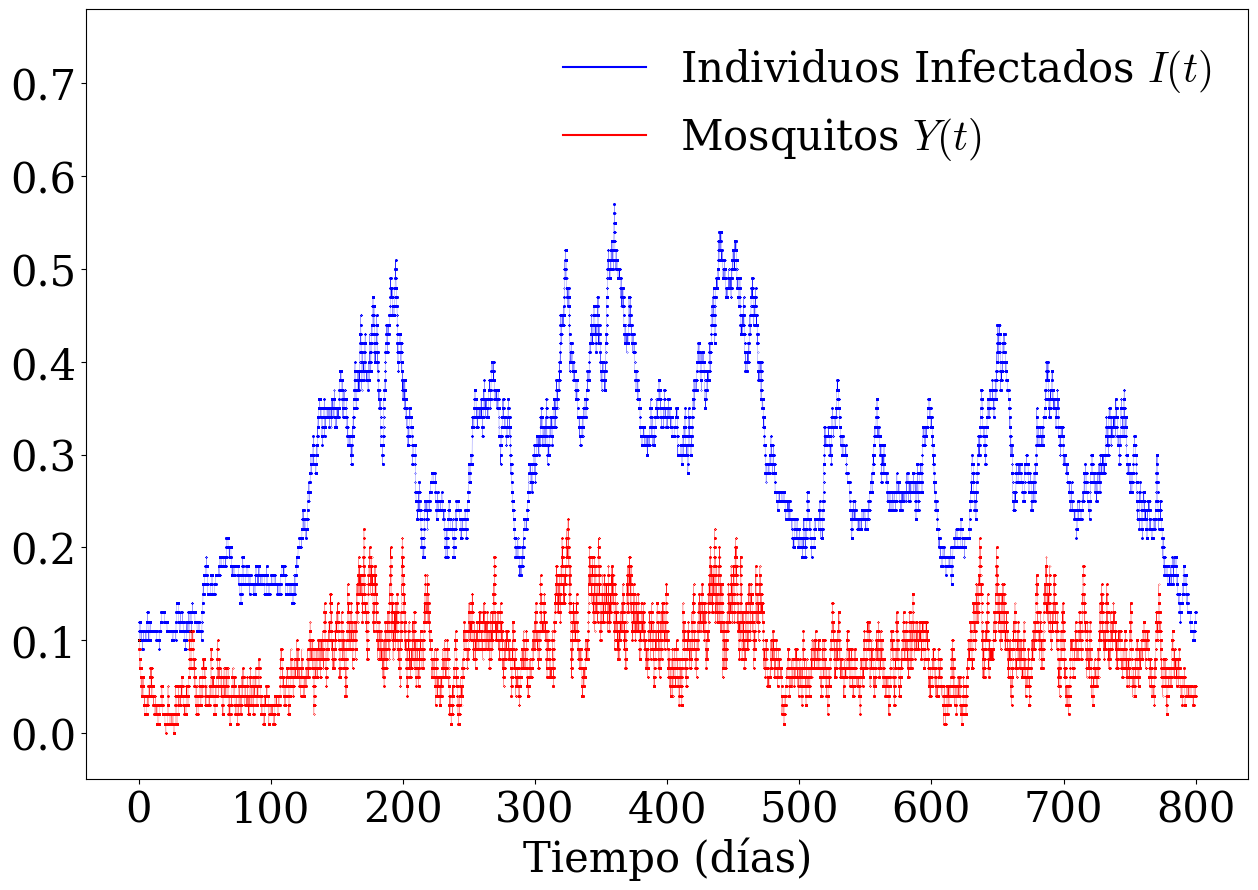

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_ylim(-0.05, 0.78)

ax.plot(sim_dict["time"], sim_dict["sim1"]["I"], ".-",color='b',lw = 0.15,ms = 0.15 )#ls='-.'
ax.plot(sim_dict["time"], sim_dict["sim1"]["Y"], ".-",color='r', lw = 0.15,ms = 0.15 )

ax.plot(sim_dict["time"], sim_dict["sim1"]["I"]*0 -1, ls = "solid",color='b' , label=r'Individuos Infectados $I(t)$')#ls='-.'
ax.plot(sim_dict["time"], sim_dict["sim1"]["Y"]*0 -1, ls = "solid",color='r',label=r'Mosquitos $Y(t)$')

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)



In [ ]:
1

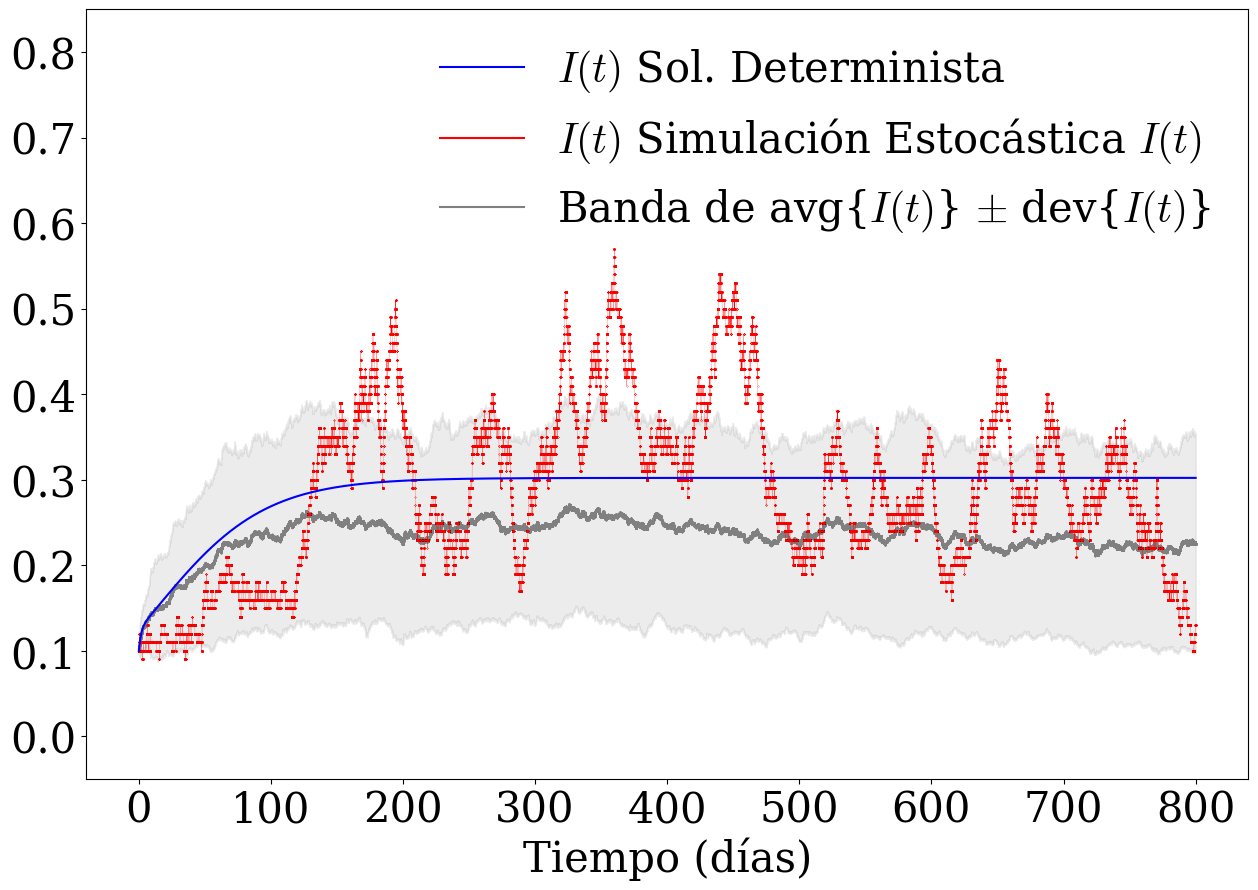

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_ylim(-0.05, 0.85)

ax.fill_between(sim_dict["time"], sim_dict["std_minus"]["I"],sim_dict["std_plus"]["I"], alpha=0.15,color = "gray")
ax.plot(sim_dict["time"], sim_dict["avg"]["I"], ".-",color='gray', lw = 0.15,ms = 0.15 )
ax.plot(sim_dict["time"], sim_dict["sim1"]["I"], ".-",color='r', lw = 0.15,ms = 0.15 )
ax.plot(sim_dict["time"], solution_ipv_tau[0,:]*conf.param_scale_det["I0"], ls = "solid",color='b', label=r'$I(t)$ Sol. Determinista')

ax.plot(sim_dict["time"], sim_dict["time"]*0 -1, ls = "solid",color='r',label=r'$I(t)$ Simulación Estocástica $I(t)$')
ax.plot(sim_dict["time"], sim_dict["time"]*0 -1, ls = "solid",color='gray',label=r'Banda de avg{$I(t)$} $\pm$ dev{$I(t)$}')


ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'{}I_det_vs_tauleap_mod5ec_bandas.png'.format(conf.ruta_escritura))

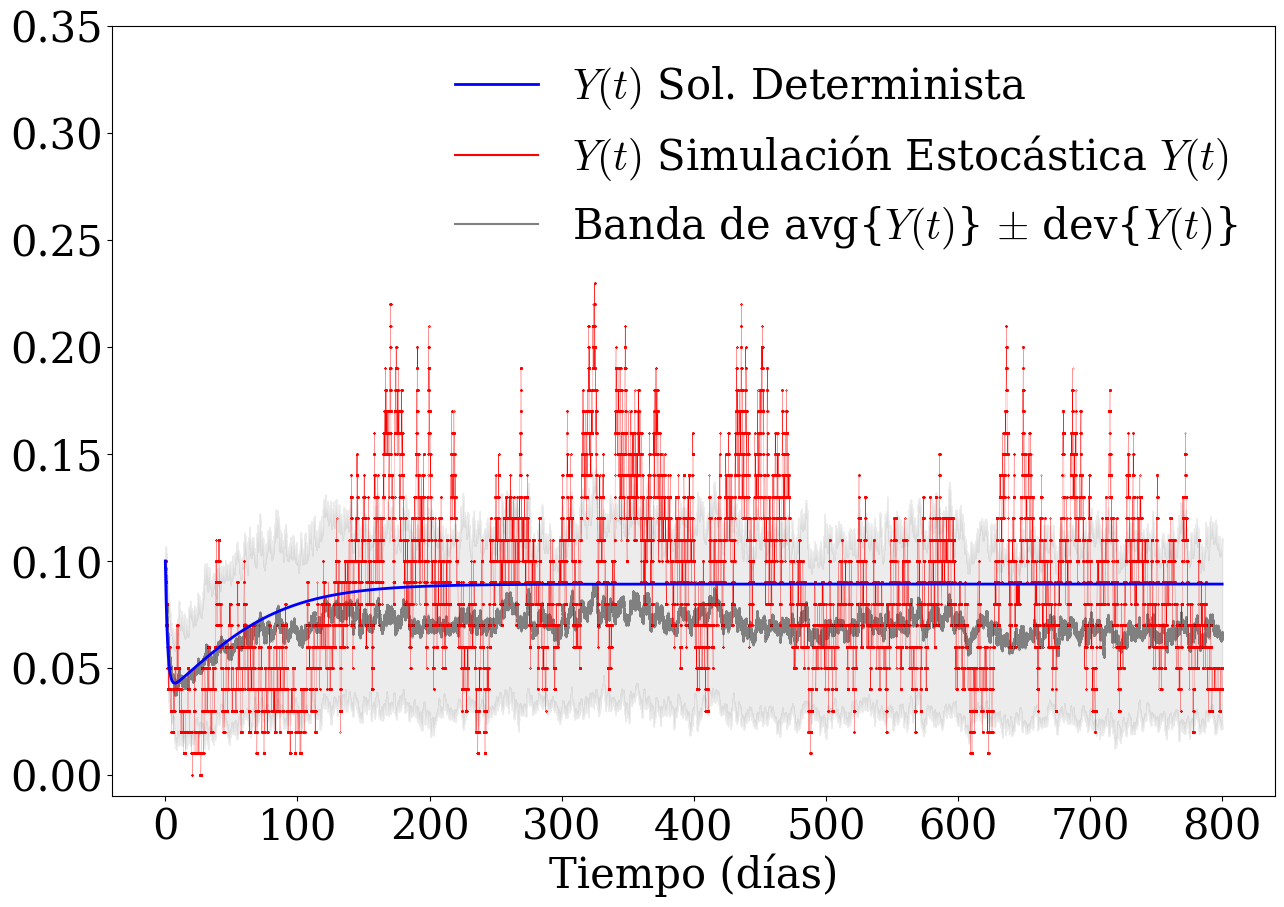

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_ylim(-0.01, 0.35)

ax.fill_between(sim_dict["time"], sim_dict["std_minus"]["Y"],sim_dict["std_plus"]["Y"], alpha=0.15,color = "gray")
ax.plot(sim_dict["time"], sim_dict["avg"]["Y"], ".-",color='gray', lw = 0.1,ms = 0.1 )
ax.plot(sim_dict["time"], sim_dict["sim1"]["Y"], ".-",color='r', lw = 0.15,ms = 0.15 )
ax.plot(sim_dict["time"], solution_ipv_tau[1,:]*conf.param_scale_det["Y0"], ls = "solid",color='b',lw=2, label=r'$Y(t)$ Sol. Determinista')

ax.plot(sim_dict["time"], sim_dict["time"]*0 -1, ls = "solid",color='r',label=r'$Y(t)$ Simulación Estocástica $Y(t)$')
ax.plot(sim_dict["time"], sim_dict["time"]*0 -1, ls = "solid",color='gray',label=r'Banda de avg{$Y(t)$} $\pm$ dev{$Y(t)$}')

ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'{}Y_det_vs_tauleap_mod5ec_bandas.png'.format(conf.ruta_escritura))

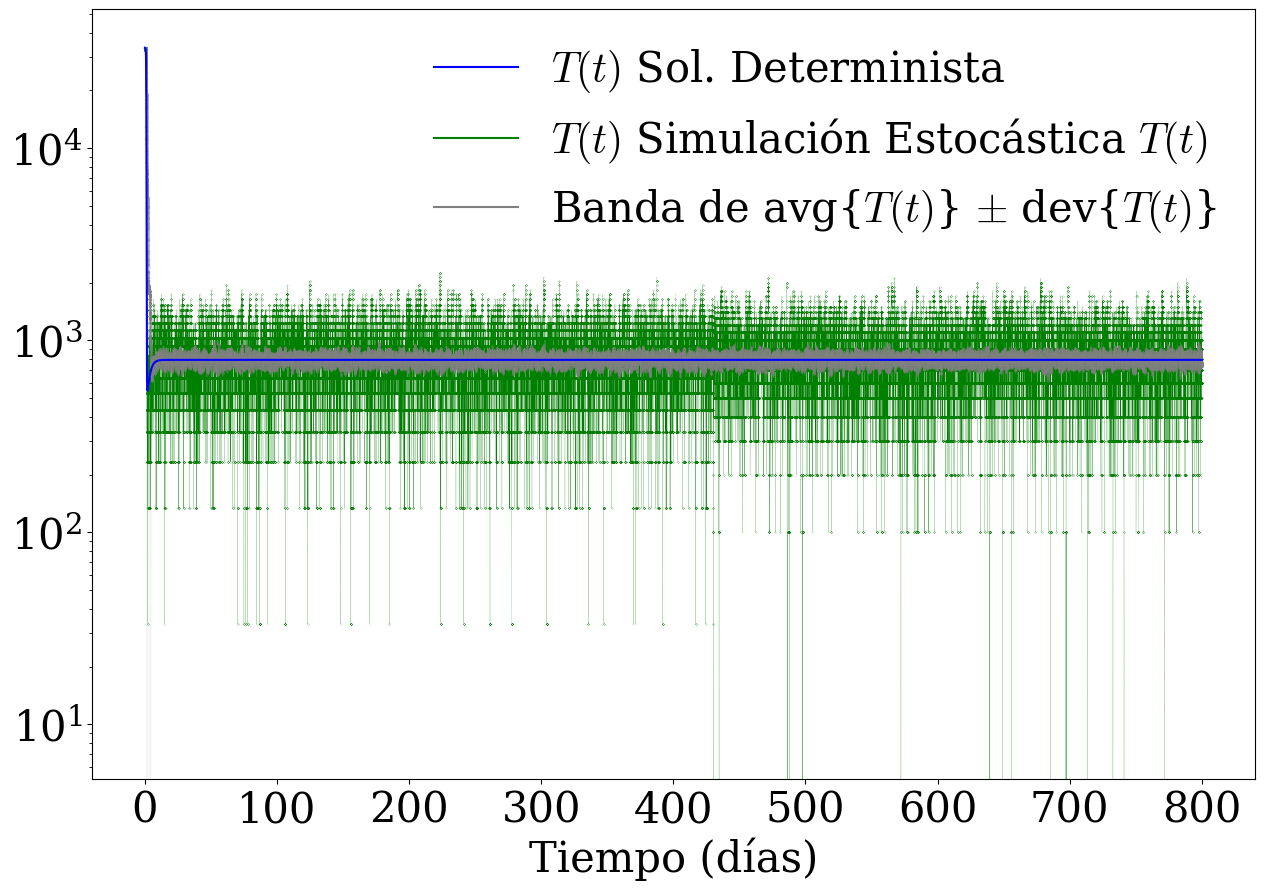

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")

ax.plot(sim_dict["time"], sim_dict["sim1"]["T"], ".-",color='g', lw = 0.1,ms = 0.1 )
ax.fill_between(sim_dict["time"], sim_dict["std_minus"]["T"],sim_dict["std_plus"]["T"], alpha=0.05,color = "gray")
ax.plot(sim_dict["time"], sim_dict["avg"]["T"], ".-",color='gray', lw = 0.15,ms = 0.15 )

ax.plot(sim_dict["time"], solution_ipv_tau[2,:]*conf.param_scale_det["T0"], ls = "solid",color='b', label=r'$T(t)$ Sol. Determinista')

ax.plot(sim_dict["time"], sim_dict["time"]*0 -1, ls = "solid",color='g',label=r'$T(t)$ Simulación Estocástica $T(t)$')
ax.plot(sim_dict["time"], sim_dict["time"]*0 -1, ls = "solid",color='gray',label=r'Banda de avg{$T(t)$} $\pm$ dev{$T(t)$}')


ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'{}T_det_vs_tauleap_mod5ec_bandas.png'.format(conf.ruta_escritura))

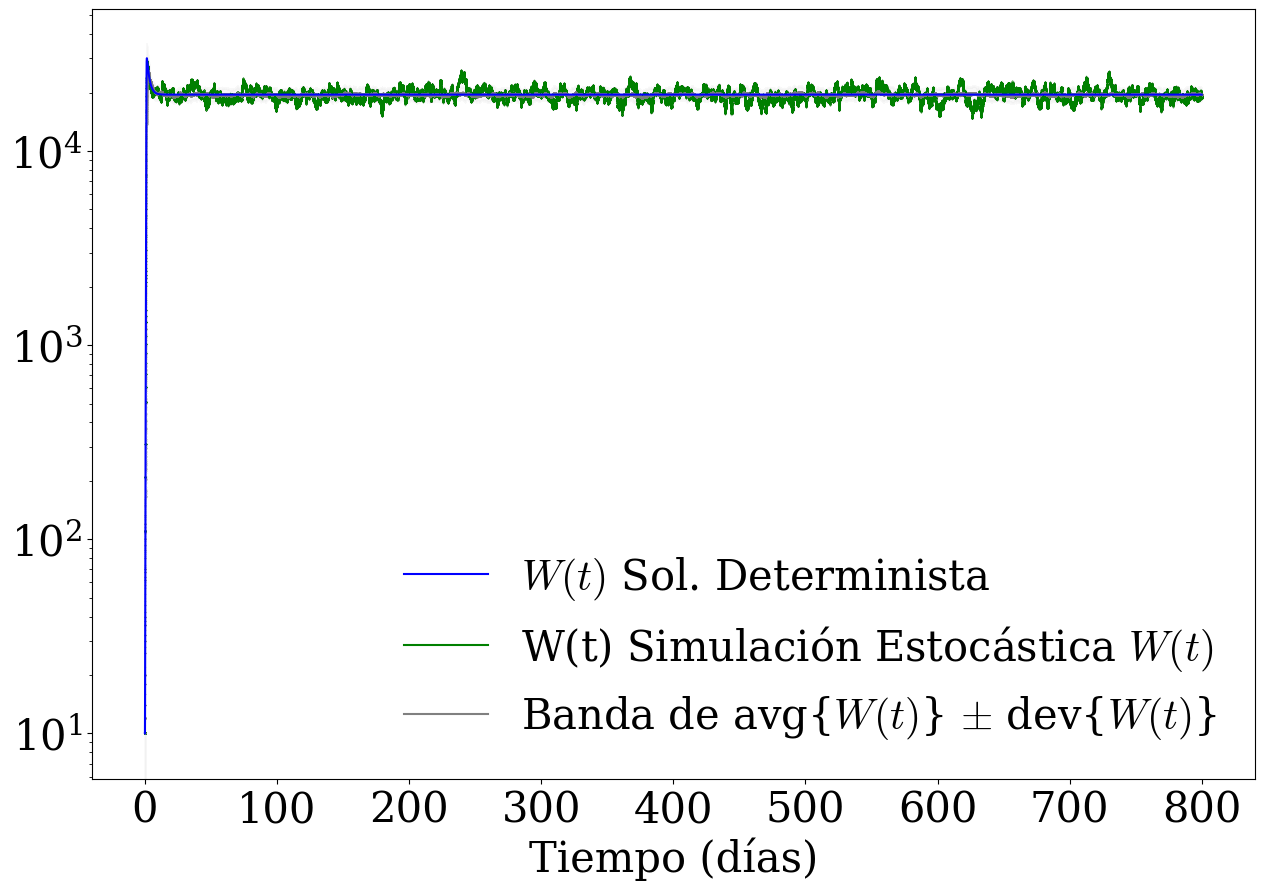

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

ax.set_yscale("log")

ax.plot(sim_dict["time"], sim_dict["sim1"]["W"], ".-",color='g', lw = 0.1,ms = 0.1 )
ax.fill_between(sim_dict["time"], sim_dict["std_minus"]["W"],sim_dict["std_plus"]["W"], alpha=0.05,color = "gray")
ax.plot(sim_dict["time"], sim_dict["avg"]["W"], ".-",color='gray', lw = 0.15,ms = 0.15 )

ax.plot(sim_dict["time"], solution_ipv_tau[3,:]*conf.param_scale_det["W0"], ls = "solid",color='b', label=r'$W(t)$ Sol. Determinista')

ax.plot(sim_dict["time"], sim_dict["time"]*0 -1, ls = "solid",color='g',label=r'W(t) Simulación Estocástica $W(t)$')
ax.plot(sim_dict["time"], sim_dict["time"]*0 -1, ls = "solid",color='gray',label=r'Banda de avg{$W(t)$} $\pm$ dev{$W(t)$}')


ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'{}W_det_vs_tauleap_mod5ec_bandas.png'.format(conf.ruta_escritura))

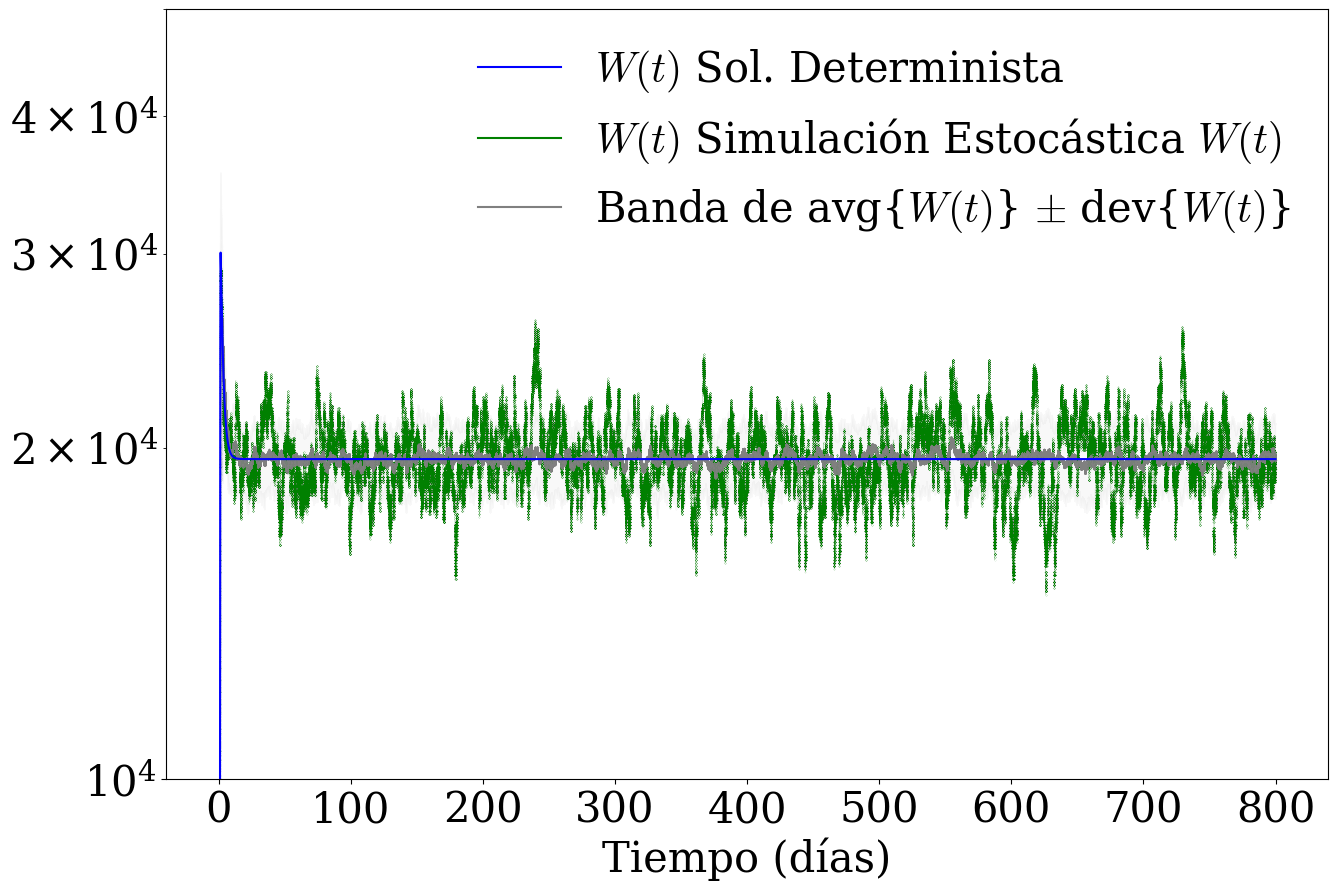

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(10000, 50000)
ax.set_yscale("log")

ax.plot(sim_dict["time"], sim_dict["sim1"]["W"], ".-",color='g', lw = 0.1,ms = 0.1 )
ax.fill_between(sim_dict["time"], sim_dict["std_minus"]["W"],sim_dict["std_plus"]["W"], alpha=0.05,color = "gray")
ax.plot(sim_dict["time"], sim_dict["avg"]["W"], ".-",color='gray', lw = 0.15,ms = 0.15 )

ax.plot(sim_dict["time"], solution_ipv_tau[3,:]*conf.param_scale_det["W0"], ls = "solid",color='b', label=r'$W(t)$ Sol. Determinista')

ax.plot(sim_dict["time"], sim_dict["time"]*0 -1, ls = "solid",color='g',label=r'$W(t)$ Simulación Estocástica $W(t)$')
ax.plot(sim_dict["time"], sim_dict["time"]*0 -1, ls = "solid",color='gray',label=r'Banda de avg{$W(t)$} $\pm$ dev{$W(t)$}')


ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'{}W_det_vs_tauleap_mod5ec_bandas_zoom.png'.format(conf.ruta_escritura))

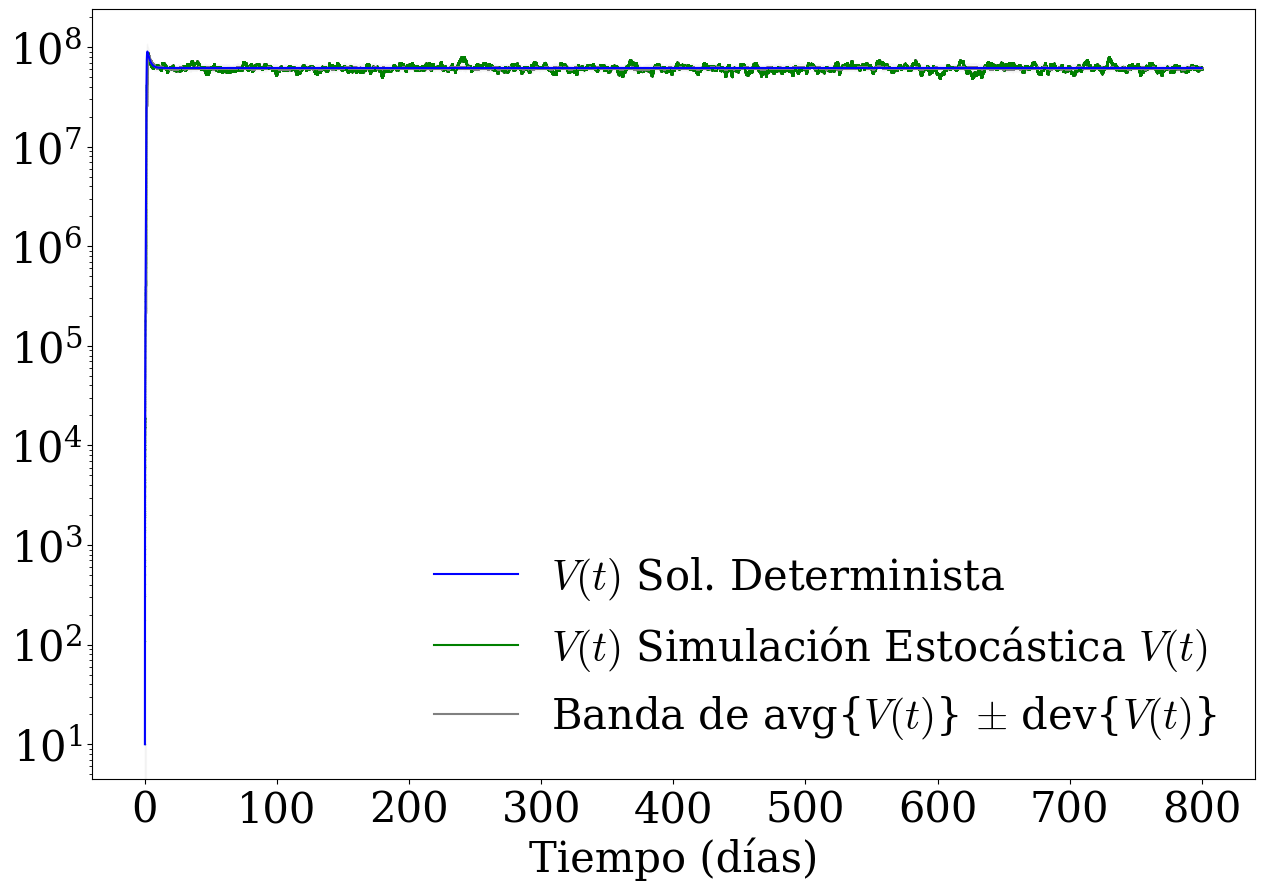

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_yscale("log")

ax.plot(sim_dict["time"], sim_dict["sim1"]["V"], ".-",color='g', lw = 0.1,ms = 0.1 )
ax.fill_between(sim_dict["time"], sim_dict["std_minus"]["V"],sim_dict["std_plus"]["V"], alpha=0.05,color = "gray")
ax.plot(sim_dict["time"], sim_dict["avg"]["V"], ".-",color='gray', lw = 0.15,ms = 0.15 )

ax.plot(sim_dict["time"], solution_ipv_tau[4,:]*conf.param_scale_det["V0"], ls = "solid",color='b', label=r'$V(t)$ Sol. Determinista')

ax.plot(sim_dict["time"], sim_dict["time"]*0 -1, ls = "solid",color='g',label=r'$V(t)$ Simulación Estocástica $V(t)$')
ax.plot(sim_dict["time"], sim_dict["time"]*0 -1, ls = "solid",color='gray',label=r'Banda de avg{$V(t)$} $\pm$ dev{$V(t)$}')


ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'{}V_det_vs_tauleap_mod5ec_bandas.png'.format(conf.ruta_escritura))

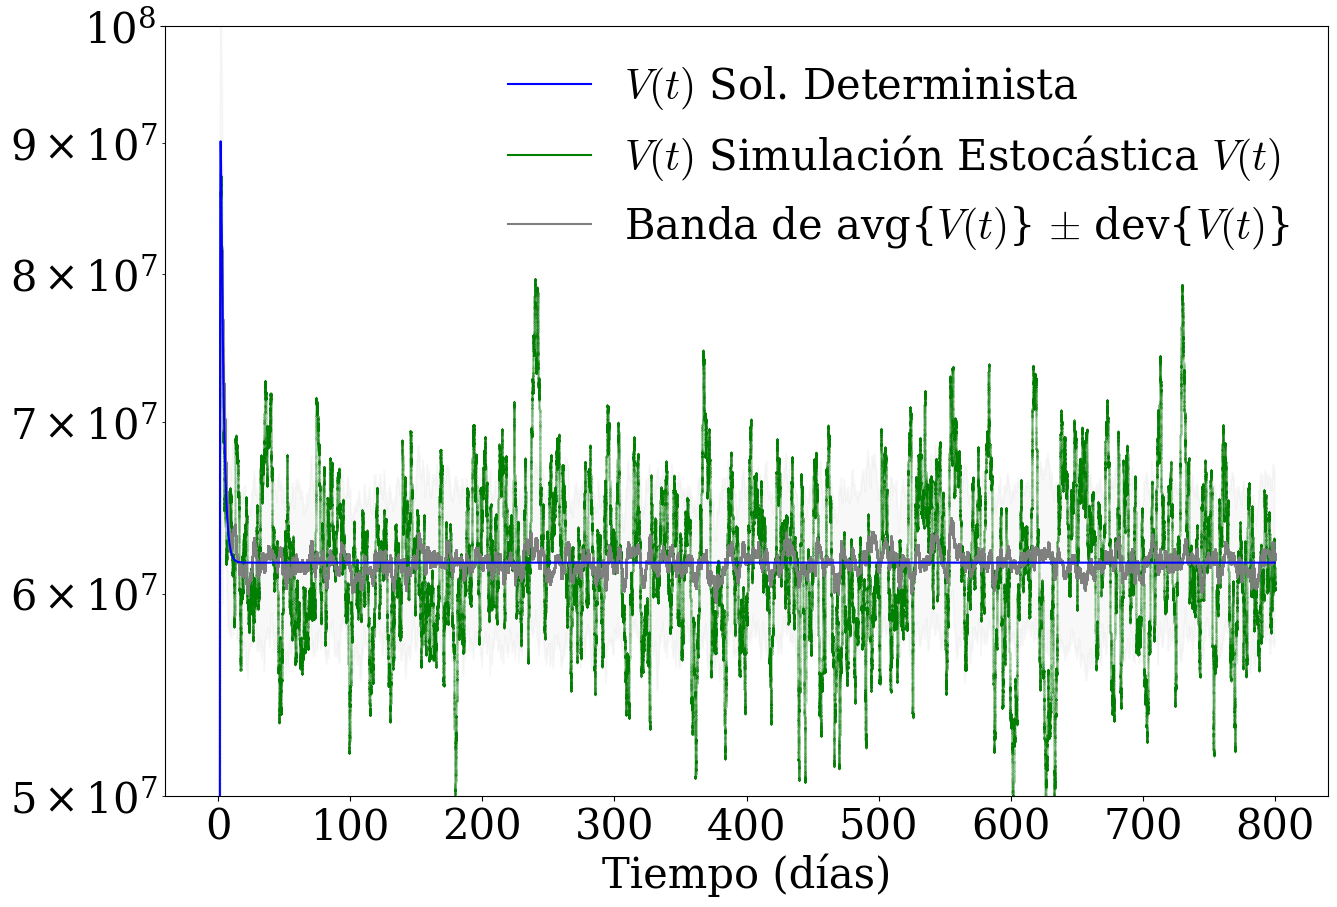

In [ ]:
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.set_ylim(50_000_000, 100_000_000)
ax.set_yscale("log")

ax.plot(sim_dict["time"], sim_dict["sim1"]["V"], ".-",color='g', lw = 0.1,ms = 0.1 )
ax.fill_between(sim_dict["time"], sim_dict["std_minus"]["V"],sim_dict["std_plus"]["V"], alpha=0.05,color = "gray")
ax.plot(sim_dict["time"], sim_dict["avg"]["V"], ".-",color='gray', lw = 0.15,ms = 0.15 )

ax.plot(sim_dict["time"], solution_ipv_tau[4,:]*conf.param_scale_det["V0"], ls = "solid",color='b', label=r'$V(t)$ Sol. Determinista')

ax.plot(sim_dict["time"], sim_dict["time"]*0 -1, ls = "solid",color='g',label=r'$V(t)$ Simulación Estocástica $V(t)$')
ax.plot(sim_dict["time"], sim_dict["time"]*0 -1, ls = "solid",color='gray',label=r'Banda de avg{$V(t)$} $\pm$ dev{$V(t)$}')


ax.legend(loc='best',prop={'size':30},frameon=False)
ax.set_xlabel(r'Tiempo (días)', fontsize=30)

fig.savefig(r'{}V_det_vs_tauleap_mod5ec_bandas_zoom.png'.format(conf.ruta_escritura))

# Gráficas sobre el número básico de reproducción.

### Grafica con $R_2=2$

In [ ]:
lambda_may = conf.param_r0_2["lambda_may"]
m = conf.param_r0_2["m"]
d = conf.param_r0_2["d"]
p = conf.param_r0_2["p"]
c = conf.param_r0_2["c"]
a = conf.param_r0_2["a"]
k = conf.param_r0_2["k"]

In [ ]:

E=0
g = fs.gE(a,E)



alpha1 = fs.calculate_a1(g, m, d, p, T0_value, Rv0_value)

alpha2 = fs.calculate_a2(T0_value, Rv0_value)

_,T_tilde_minus_value =  fs.T_tilde(a1 = alpha1, a2 = alpha2)


RvE_1 = fs.RvE(T0_value,T_tilde_minus_value)
RvE_2_ = fs.RvE_2(T0_value, alpha1, alpha2)


print("Rv0 = {}".format(Rv0_value))
print("T0 = {}".format(T0_value))
print("T menos = {}".format(T_tilde_minus_value))
print("RvE v1 = {}".format(RvE_1))
print("RvE v2 = {}".format(RvE_2_))
print("k tal que R0=2",fs.k_(T0 = T0_value ,R0 = 0.9, p = p ,c = c ,m = m ,d = d))
print("k tal que R0=0.9",fs.k_(T0 = T0_value ,R0 = 2, p = p ,c = c ,m = m ,d = d))

Rv0 = 1.9669551534225016
T0 = 16129.032258064517
T menos = 8200.000000000005
RvE v1 = 1.9669551534225007
RvE v2 = 1.9669551534225007
k tal que R0=2 4.5756e-08
k tal que R0=0.9 1.0168000000000001e-07


In [ ]:
Rv0_value = 2
T0_value = fs.T0_(lambda_may = lambda_may,m = m)
Rv0_value = fs.Rv0(T0 = T0_value ,k = k, p = p ,c = c ,m = m ,d = d)


### Componente T del punto de equilibrio libre de la enfermedad
T0_value = fs.T0_(lambda_may = lambda_may,m = m)
### Número básico de reproducción del sistema intra huésped con E=0
Rv0_value = fs.Rv0(T0 = T0_value ,k = k, p = p ,c = c ,m = m ,d = d)

## Contaminación del ambiente
E_values = np.linspace(0, 1, 100)


### Cálculos para Rv(E)
a1_values  = fs.calculate_a1( g = fs.gE(a = a, E = E_values)\
                                       , m = m, d = d, p = p\
                                        , T0 = T0_value
                                        , Rv0 = Rv0_value)

a2_values  = fs.calculate_a2( T0 = T0_value, Rv0 = Rv0_value)
### Entrada T del punto de equilibrio endémico
T_tilde_plus_values,T_tilde_minus_values =  fs.T_tilde( a1 = a1_values[:,None], a2 = a2_values)
### Número básico de reproducción con E>0
RvE_values = fs.RvE(T0 = T0_value \
                 ,T_tilde_minus = T_tilde_minus_values)

## Escalamiento del Punto de equilibrio
T_tilde_minus__T0 = T_tilde_minus_values/T0_value

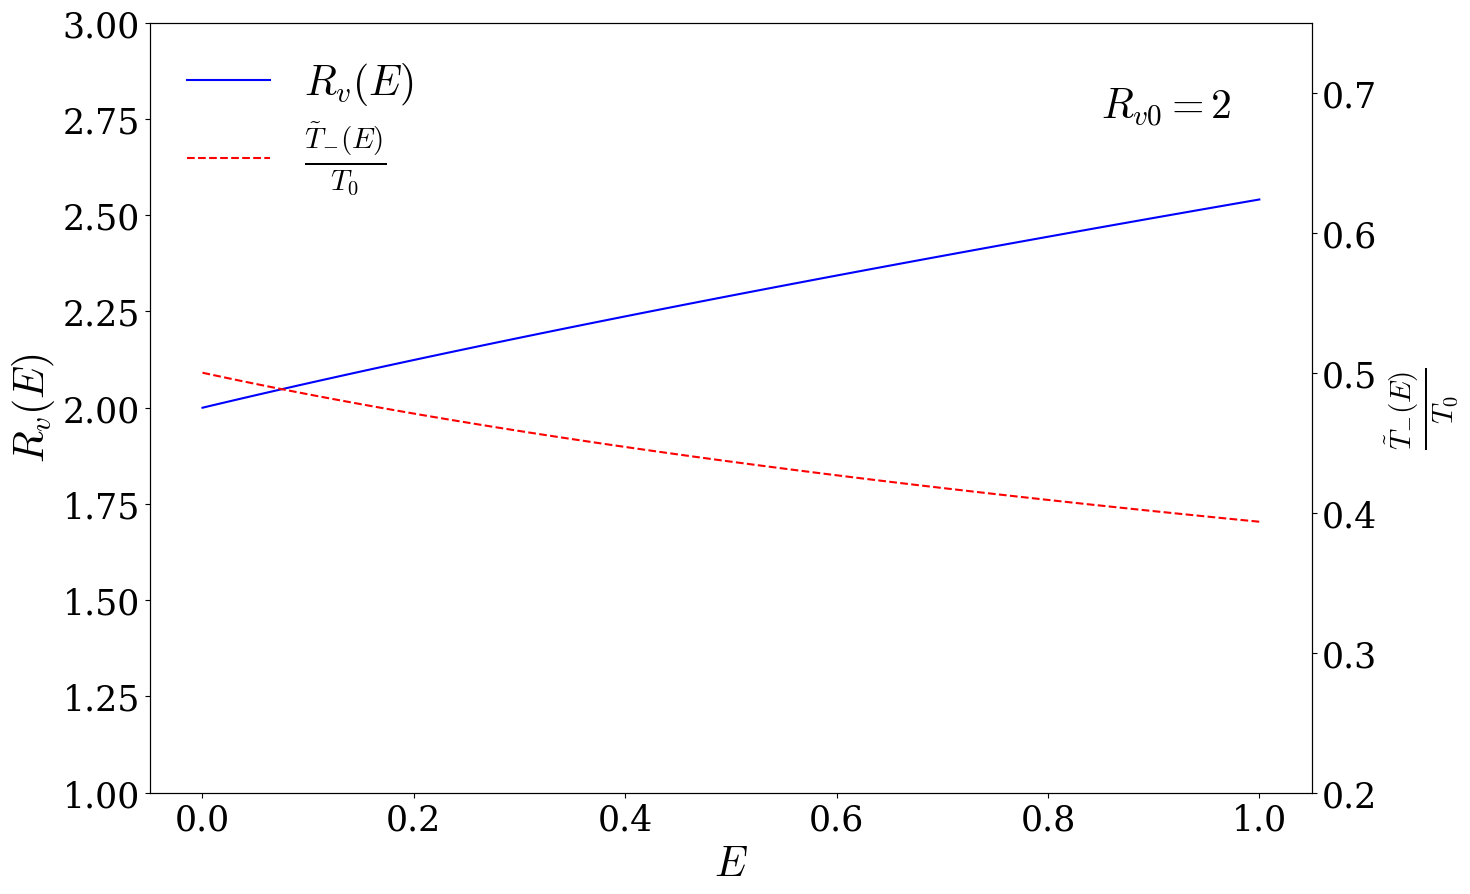

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(1, 1, 1)

ax1.set_xlabel(r'$E$',fontsize=30)
ax1.set_ylabel(r'$R_v(E)$',fontsize=30)
ax1.set_ylim(1, 3)
ax1.plot(E_values, RvE_values, color='b', ls='solid', label=r'$R_v(E)$')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel(r'$\frac{\tilde{T}_{-}(E)}{T_0}$',fontsize=30)
ax2.set_ylim(0.2, 0.75)
ax2.plot(E_values, T_tilde_minus__T0, color='r', ls='dashed',label=r'$\frac{\tilde{T}_{-}(E)}{T_0}$')
ax2.tick_params(axis='y')

ax1.text(0.85, 2.75, r'$R_{v0}=2$' , fontsize=30)

ax1.legend(loc='upper left', prop={'size':30} , bbox_to_anchor=(0.0, 1),frameon=False )
ax2.legend(loc='upper left', prop={'size':30}, bbox_to_anchor=(0.0, 0.923),frameon=False)

fig.savefig(r'{}Rve_T_vs_E_R0eq2_2ejes.png'.format(conf.ruta_escritura))

### Grafica con $R_2=0.9$

Se calcula el parámetro $k$ tal que $R_2=0.9$.

In [ ]:
lambda_may = conf.param_r0_2["lambda_may"]
m = conf.param_r0_2["m"]
d = conf.param_r0_2["d"]
p = conf.param_r0_2["p"]
c = conf.param_r0_2["c"]
a = conf.param_r0_2["a"]

T0_value = fs.T0_(lambda_may = lambda_may,m = m)


In [ ]:
k = fs.k_(T0 = T0_value ,R0 = 0.9, p = p ,c = c ,m = m ,d = d)
print("k tal que R0=0.9 : ",k)

In [ ]:

print("k = ",k)
E=0
g = fs.gE(a,E)



alpha1 = calculate_a1(g, m, d, p, T0_value, Rv0_value)

alpha2 = calculate_a2(T0_value, Rv0_value)

_,T_tilde_minus_value =  T_tilde(a1 = alpha1, a2 = alpha2)


RvE_1 = RvE(T0_value,T_tilde_minus_value)
RvE_2_ = RvE_2(T0_value, alpha1, alpha2)


print("Rv0 = {}".format(Rv0_value))
print("T0 = {}".format(T0_value))
print("T menos = {}".format(T_tilde_minus_value))
print("RvE v1 = {}".format(RvE_1))
print("RvE v2 = {}".format(RvE_2_))

k =  4.5756e-08
Rv0 = 0.9
T0 = 16129.032258064517
T menos = 16129.032258064508
RvE v1 = 1.0000000000000007
RvE v2 = 1.0000000000000007


In [ ]:
print("k = ",k)
E=0
g = fs.gE(a,E)

### Componente T del punto de equilibrio libre de la enfermedad
T0_value = fs.T0_(lambda_may = lambda_may,m = m)

### Componente T del punto de equilibrio libre de la enfermedad
Rv0_value = fs.Rv0(T0 = T0_value ,k = k, p = p ,c = c ,m = m ,d = d)
## Contaminación del ambiente
E_values = np.linspace(0, 1, 100)

### Cálculos para Rv(E)
a1_values  = fs.calculate_a1( g = fs.gE(a = a, E = E_values)\
                                       , m = m, d = d, p = p\
                                        , T0 = T0_value
                                        , Rv0 = Rv0_value)

a2_values  = fs.calculate_a2( T0 = T0_value
                                        , Rv0 = Rv0_value)

### Entrada T del punto de equilibrio endémico
T_tilde_plus_values,T_tilde_minus_values =  fs.T_tilde( a1 = a1_values[:,None], a2 = a2_values)

### Número básico de reproducción con E>0
RvE_values = fs.RvE(T0 = T0_value \
                 ,T_tilde_minus = T_tilde_minus_values)

## Escalamiento del Punto de equilibrio
T_tilde_minus__T0 = T_tilde_minus_values/T0_value

Text(0.5, 0, '$E$')

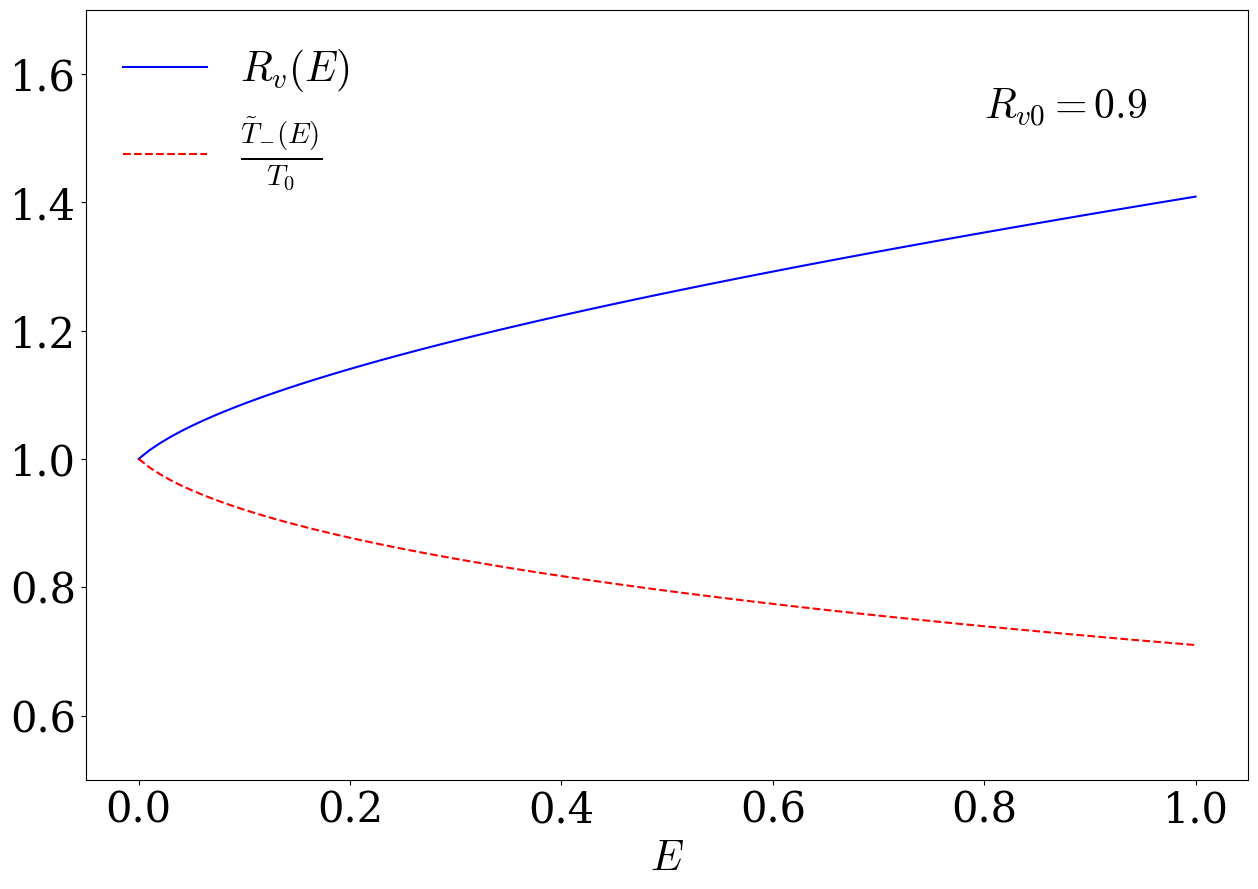

In [ ]:


plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)


fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.text(0.8, 1.53, r'$R_{v0}=0.9$' , fontsize=30)
ax.set_ylim(0.5, 1.7)
ax.plot(E_values, RvE_values, color='b', ls='solid', label=r'$R_v(E)$')
ax.plot(E_values, T_tilde_minus__T0, color='r', ls='dashed',label=r'$\frac{\tilde{T}_{-}(E)}{T_0}$')
ax.legend(loc='upper left', prop={'size':30} , frameon=False)
ax.set_xlabel(r'$E$', fontsize=30)



In [ ]:
fig.savefig(r'{}Rve_T_vs_E_R0eq09_1ejes.png'.format(conf.ruta_escritura))

### Figura 3: grafica 3D $T^*$ y $R_{v0}$ vs $E$

In [ ]:
lambda_may = conf.param_graf3D["lambda_may"]
m = conf.param_graf3D["m"]
d = conf.param_graf3D["d"]
p = conf.param_graf3D["p"]
c = conf.param_graf3D["c"]
a = conf.param_graf3D["a"]
T0_value = fs.T0_(lambda_may = lambda_may,m = m)


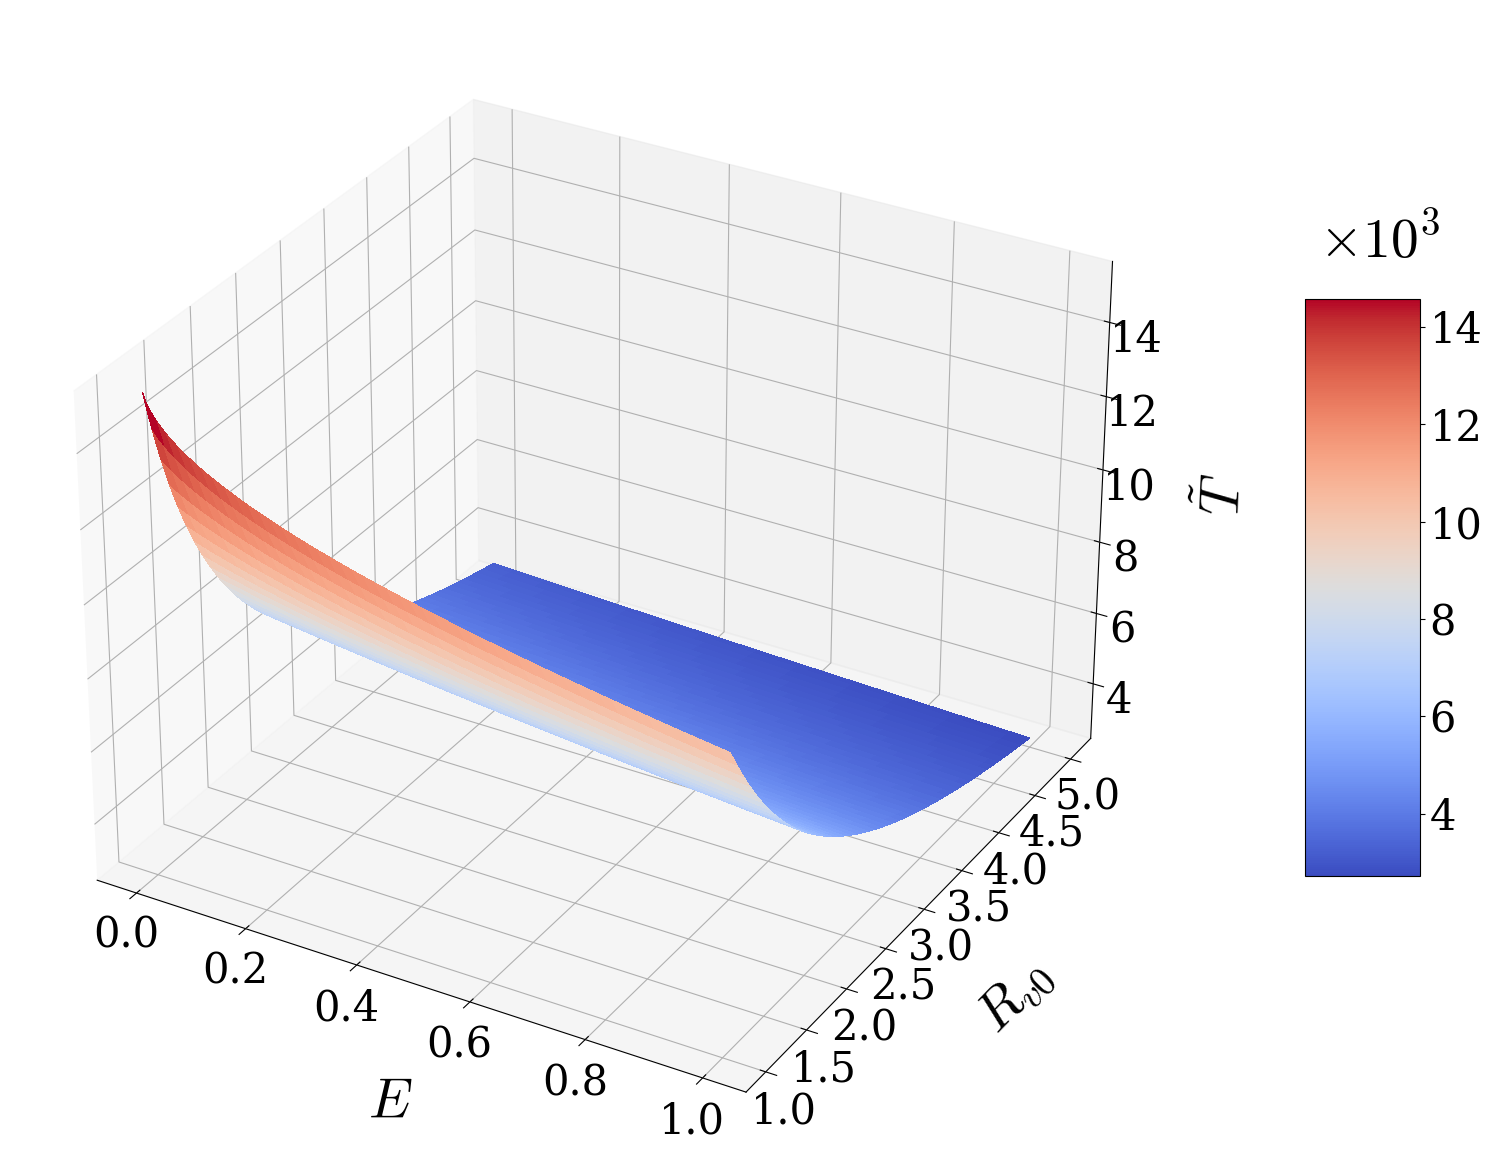

In [ ]:


plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

# Generate sample data
E_values = np.linspace(0, 1, 200)
R0_values = np.linspace(1.05, 5, 200)
E_values, R0_values = np.meshgrid(E_values, R0_values)

T_tilde_minus_values_ = fs.T_til_r0_E(Rv0 = R0_values, E  = E_values,a  = a, m = m, d = d, p = p, T0 = T0_value)

# Create a figure and 3D axis
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(E_values, R0_values, T_tilde_minus_values_)
surf = ax.plot_surface( E_values , R0_values, T_tilde_minus_values_/1000, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

#ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.00f}')

# Set labels and title
ax.set_xlabel("\n" + r'$E$', fontsize=40, loc = "left",linespacing=3)
ax.set_ylabel("\n" + r'$R_{v0}$' , fontsize=40, loc = "bottom",linespacing=3)
ax.set_zlabel("\n" + r'$\tilde{T}$', fontsize=40,labelpad=20)
#ax.set_title('3D Plot')

# Add a color bar which maps values to colors.
cbar = fig.colorbar(surf, shrink=0.5, aspect=5,pad=0.09)
cbar.ax.text(0.5, 1.05, r'  $\times 10^{3}$', fontsize=40, ha='center', va='bottom', transform=cbar.ax.transAxes)


#plt.show()
fig.savefig(r'{}fig_3d_T_vs_E_vs_R0.png'.format(conf.ruta_escritura))


<ipython-input-12-c12aec8db811>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surf = ax.contourf( E_values , R0_values, T_tilde_minus_values_/1000, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)


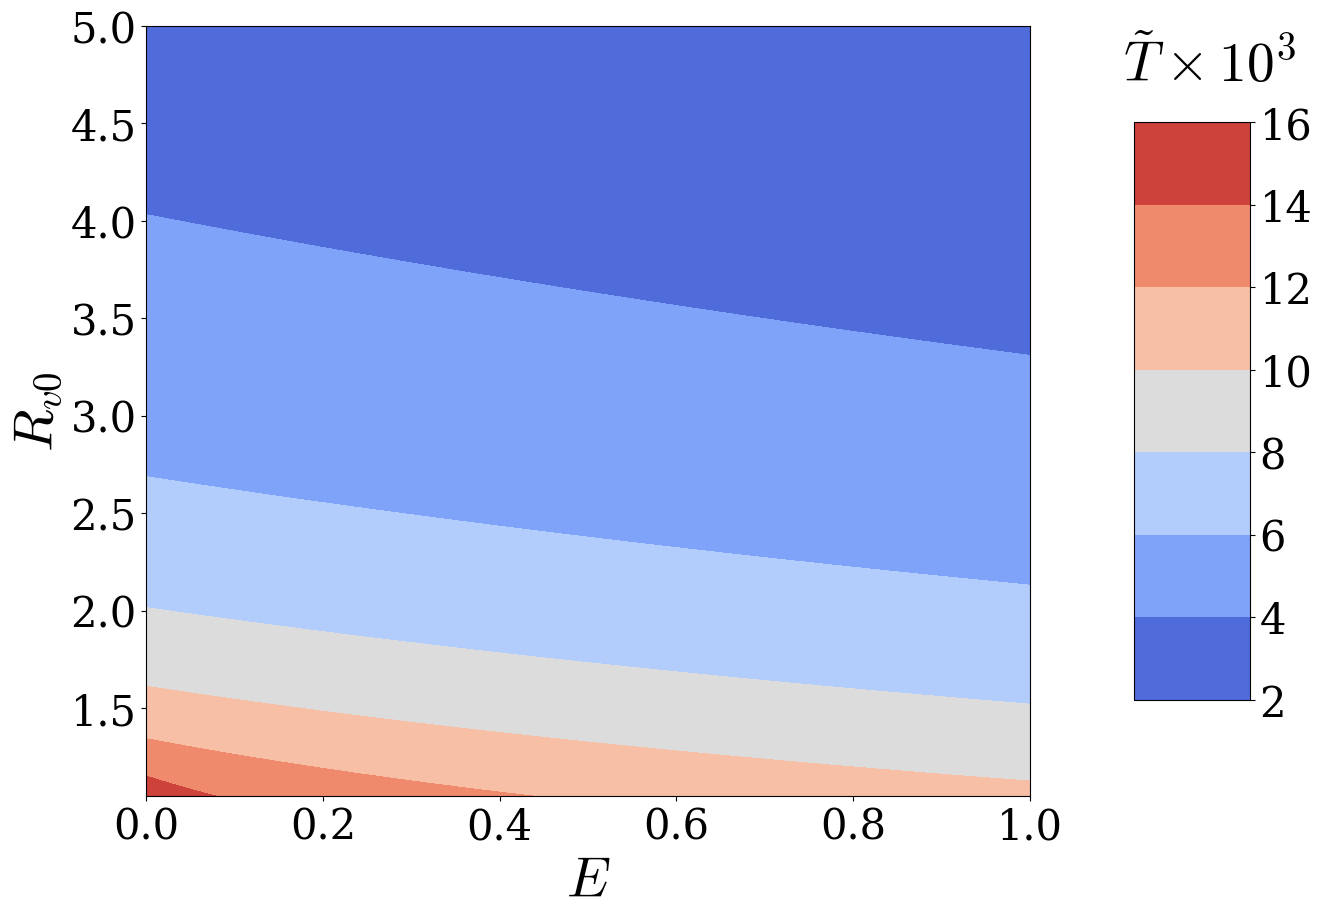

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

# Generate sample data
E_values = np.linspace(0, 1, 200)
R0_values = np.linspace(1.05, 5, 200)
E_values, R0_values = np.meshgrid(E_values, R0_values)

T_tilde_minus_values_ = fs.T_til_r0_E(Rv0 = R0_values, E  = E_values,a  = a, m = m, d = d, p = p, T0 = T0_value)

# Create a figure and 3D axis
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
# Plot the surface
#ax.plot_surface(E_values, R0_values, T_tilde_minus_values_)
surf = ax.contourf( E_values , R0_values, T_tilde_minus_values_/1000, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

# Set labels and title
ax.set_xlabel(r'$E$', fontsize=40)
ax.set_ylabel(r'$R_{v0}$' , fontsize=40)

# Add a color bar which maps values to colors.
cbar = fig.colorbar(surf, shrink=0.75, aspect=5,pad=0.09)
cbar.ax.text(0.5, 1.05, r'  $\tilde{T} \times 10^{3}$', fontsize=40, ha='center', va='bottom', transform=cbar.ax.transAxes)


#plt.show()
fig.savefig(r'{}fig_contour_T_vs_E_vs_R0.png'.format(conf.ruta_escritura))

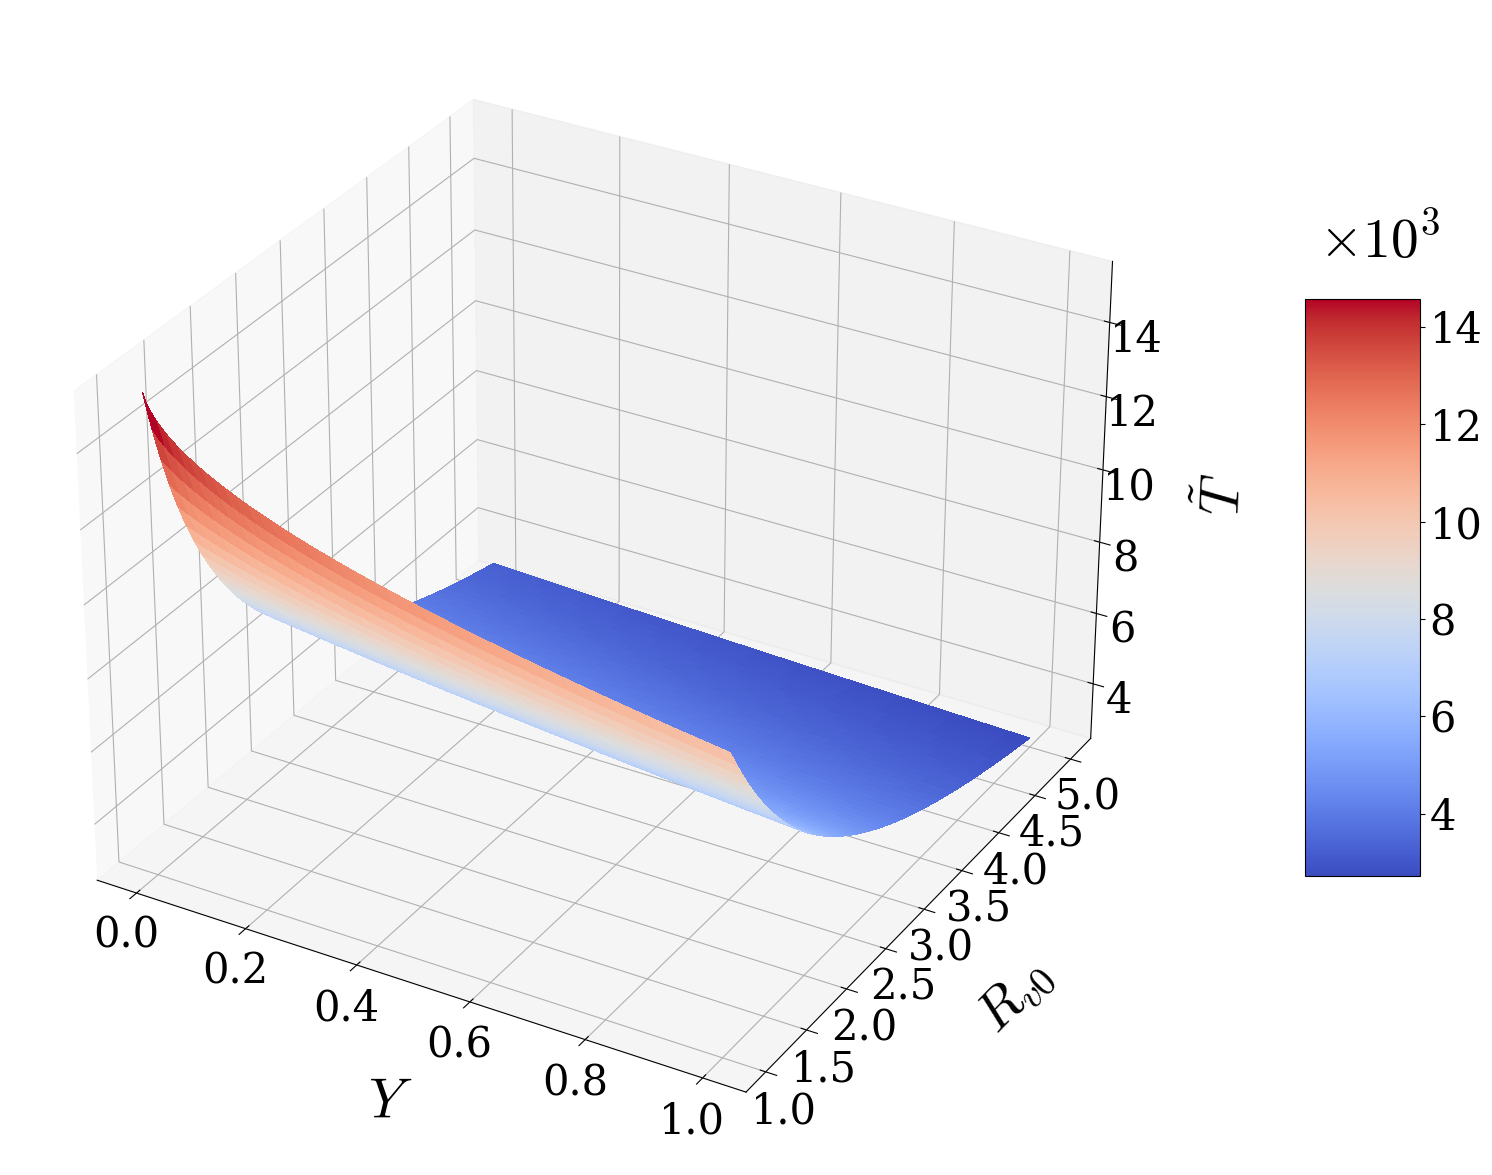

In [ ]:
from mpl_toolkits.mplot3d import Axes3D


plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

# Generate sample data
E_values = np.linspace(0, 1, 200)
R0_values = np.linspace(1.05, 5, 200)
E_values, R0_values = np.meshgrid(E_values, R0_values)

T_tilde_minus_values_ = fs.T_til_r0_E(Rv0 = R0_values, E  = E_values,a  = a, m = m, d = d, p = p, T0 = T0_value)

# Create a figure and 3D axis
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
#ax.plot_surface(E_values, R0_values, T_tilde_minus_values_)
surf = ax.plot_surface( E_values , R0_values, T_tilde_minus_values_/1000, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

#ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter('{x:.00f}')

# Set labels and title
ax.set_xlabel("\n" + r'$Y$', fontsize=40, loc = "left",linespacing=3)
ax.set_ylabel("\n" + r'$R_{v0}$' , fontsize=40, loc = "bottom",linespacing=3)
ax.set_zlabel("\n" + r'$\tilde{T}$', fontsize=40,labelpad=20)
#ax.set_title('3D Plot')

# Add a color bar which maps values to colors.
cbar = fig.colorbar(surf, shrink=0.5, aspect=5,pad=0.09)
cbar.ax.text(0.5, 1.05, r'  $\times 10^{3}$', fontsize=40, ha='center', va='bottom', transform=cbar.ax.transAxes)


#plt.show()
fig.savefig(r'{}fig_3d_T_vs_Y_vs_R0.png'.format(conf.ruta_escritura))


<ipython-input-13-9740e23b9f1a>:19: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surf = ax.contourf( E_values , R0_values, T_tilde_minus_values_/1000, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)


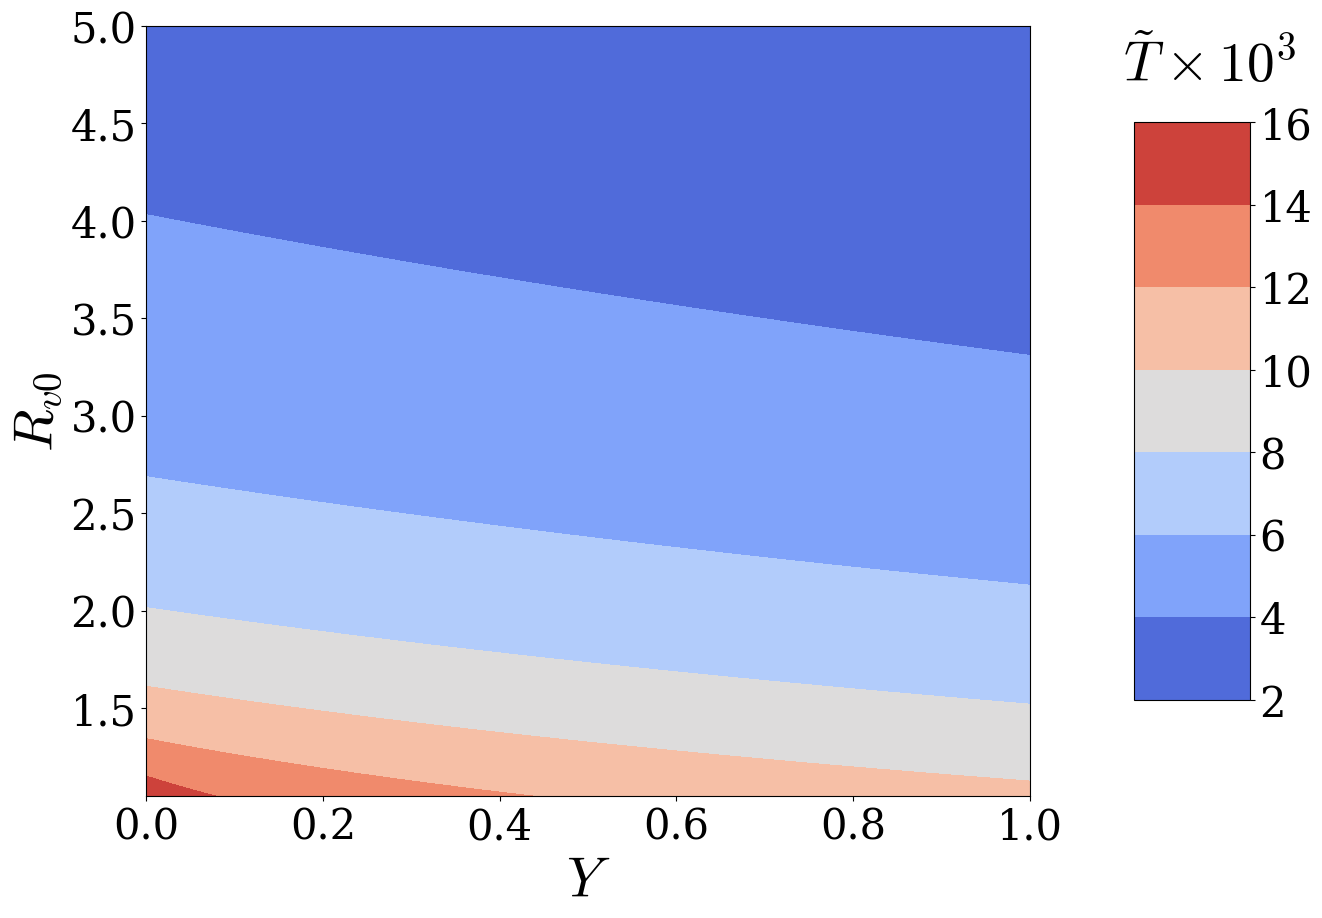

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

# Generate sample data
E_values = np.linspace(0, 1, 200)
R0_values = np.linspace(1.05, 5, 200)
E_values, R0_values = np.meshgrid(E_values, R0_values)

T_tilde_minus_values_ = fs.T_til_r0_E(Rv0 = R0_values, E  = E_values,a  = a, m = m, d = d, p = p, T0 = T0_value)

# Create a figure and 3D axis
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
# Plot the surface
#ax.plot_surface(E_values, R0_values, T_tilde_minus_values_)
surf = ax.contourf( E_values , R0_values, T_tilde_minus_values_/1000, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

# Set labels and title
ax.set_xlabel(r'$Y$', fontsize=40)
ax.set_ylabel(r'$R_{v0}$' , fontsize=40)

# Add a color bar which maps values to colors.
cbar = fig.colorbar(surf, shrink=0.75, aspect=5,pad=0.09)
cbar.ax.text(0.5, 1.05, r'  $\tilde{T} \times 10^{3}$', fontsize=40, ha='center', va='bottom', transform=cbar.ax.transAxes)


#plt.show()
fig.savefig(r'{}fig_contour_T_vs_Y_vs_R0.png'.format(conf.ruta_escritura))

#### Gráficas para W

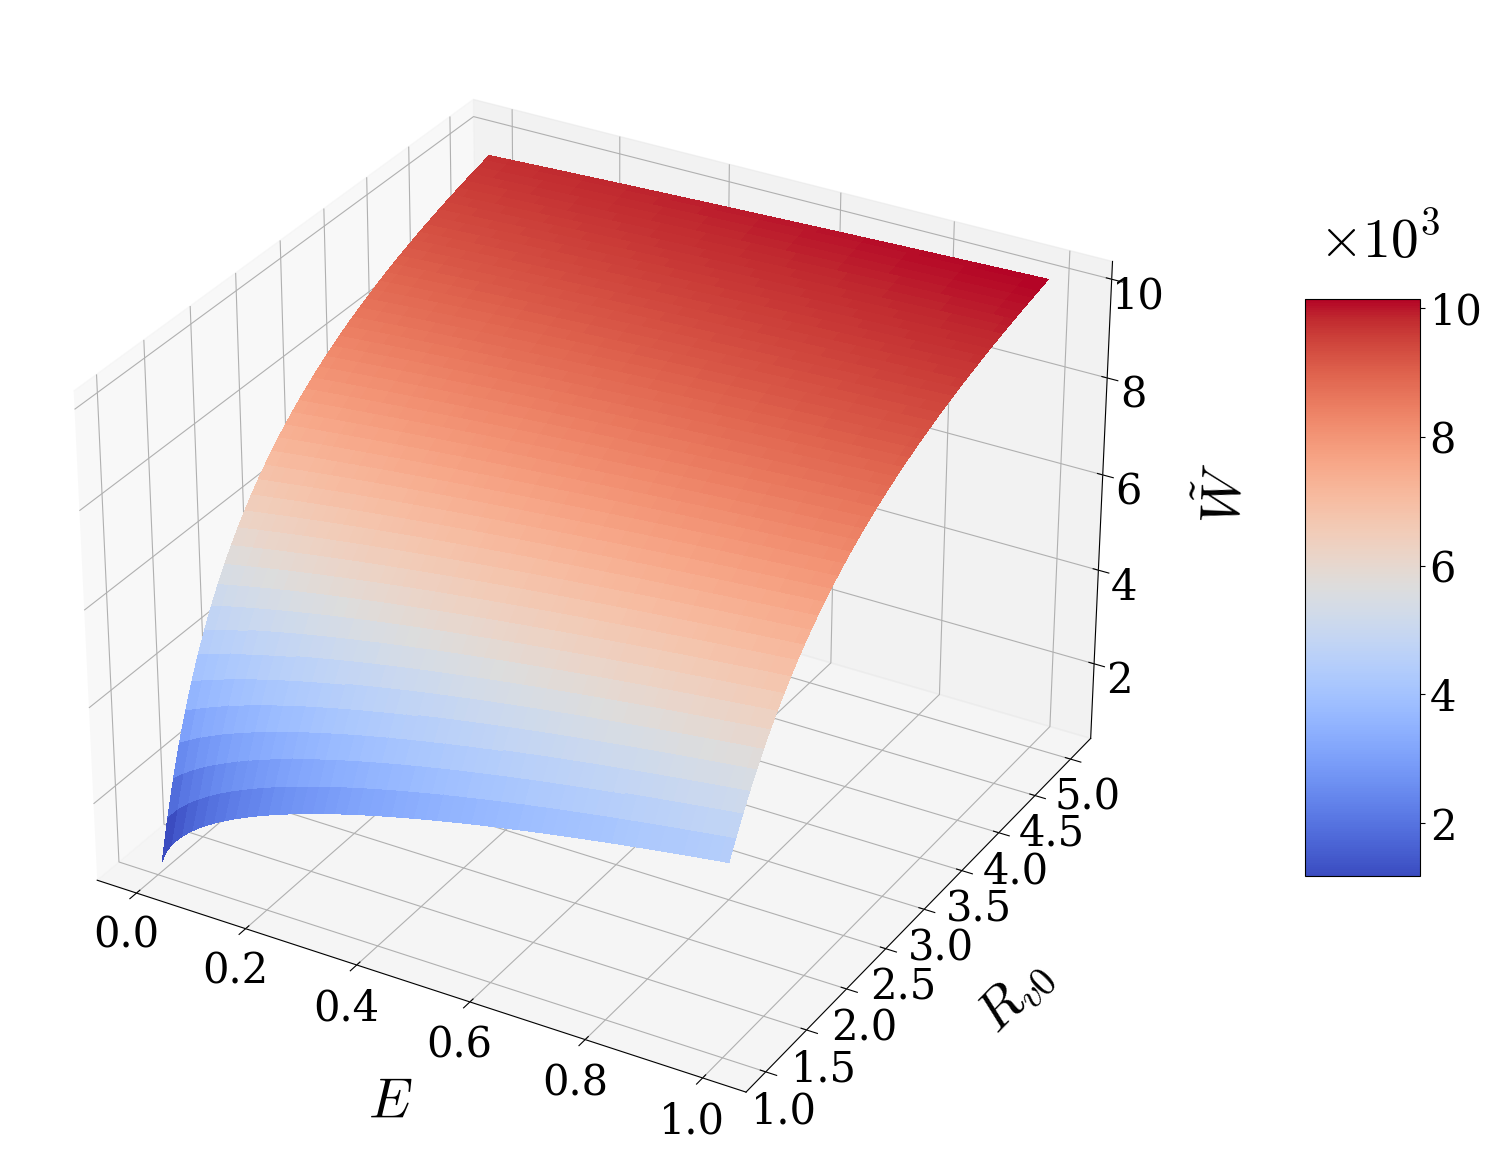

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

# Generate sample data
E_values = np.linspace(0, 1, 200)
R0_values = np.linspace(1.05, 5, 200)
E_values, R0_values = np.meshgrid(E_values, R0_values)

W_values_ = fs.W_r0_E(Rv0 = R0_values, E  = E_values,a  = a, m = m, d = d, p = p, T0 = T0_value)

# Create a figure and 3D axis
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface( E_values , R0_values, W_values_/1000 , cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

ax.zaxis.set_major_formatter('{x:.00f}')

# Set labels and title
ax.set_xlabel("\n" + r'$E$', fontsize=40, loc = "left",linespacing=3)
ax.set_ylabel("\n" + r'$R_{v0}$' , fontsize=40, loc = "bottom",linespacing=3)
ax.set_zlabel("\n" + r'$\tilde{W}$', fontsize=40,labelpad=20)

# Add a color bar which maps values to colors.
cbar = fig.colorbar(surf, shrink=0.5, aspect=5,pad=0.09)
cbar.ax.text(0.5, 1.05, r'  $\times 10^{3}$', fontsize=40, ha='center', va='bottom', transform=cbar.ax.transAxes)


# Show the plot
fig.savefig(r'{}fig_3d_W_vs_E_vs_R0.png'.format(conf.ruta_escritura))


<ipython-input-14-029c4427be3a>:18: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surf = ax.contourf( E_values , R0_values, W_values_/1000, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)


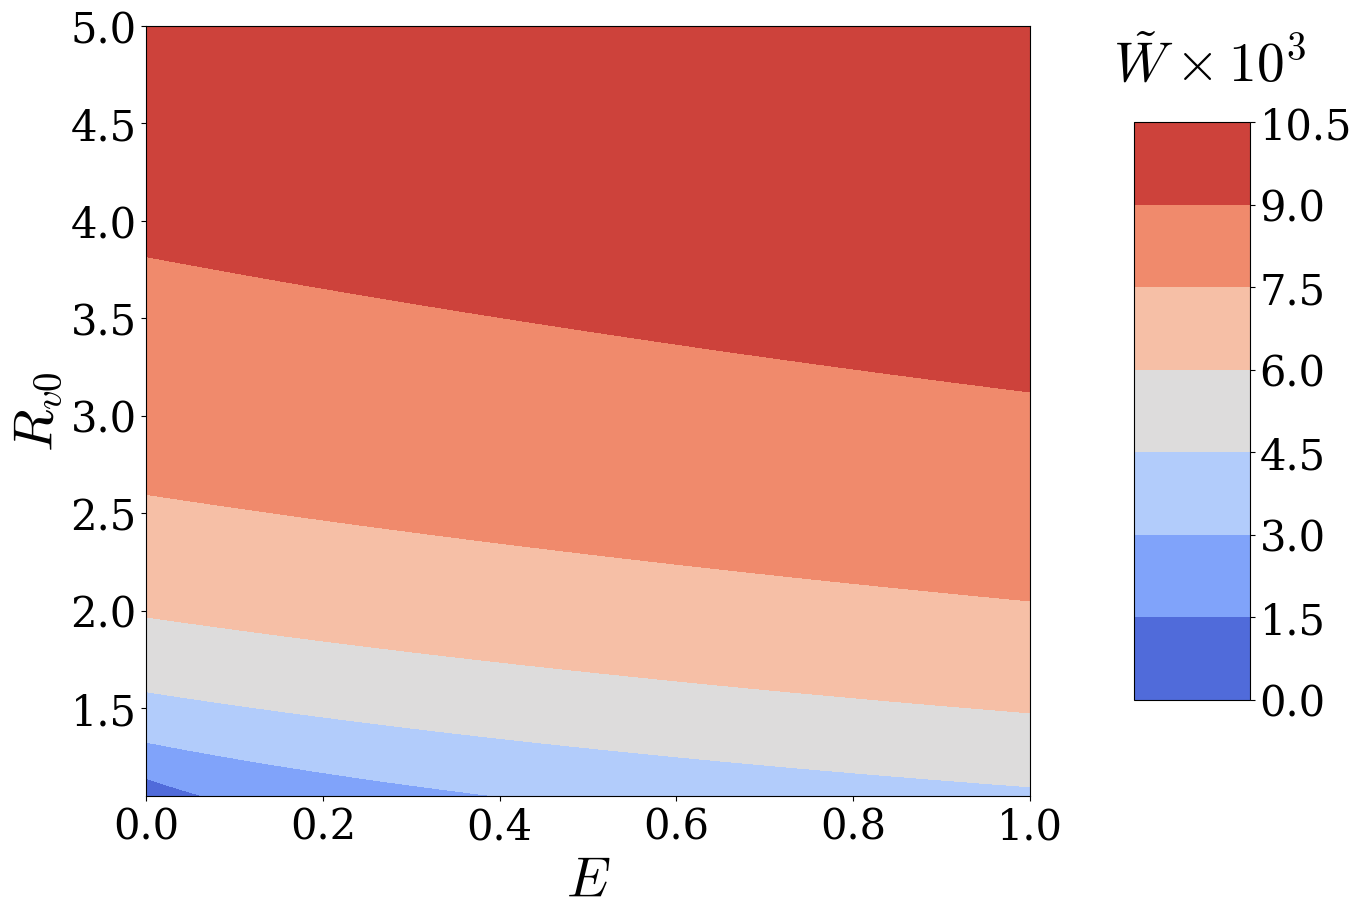

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

# Generate sample data
E_values = np.linspace(0, 1, 200)
R0_values = np.linspace(1.05, 5, 200)
E_values, R0_values = np.meshgrid(E_values, R0_values)

W_values_ = fs.W_r0_E(Rv0 = R0_values, E  = E_values,a  = a, m = m, d = d, p = p, T0 = T0_value)

# Create a figure and 3D axis
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
# Plot the surface
surf = ax.contourf( E_values , R0_values, W_values_/1000, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

# Set labels and title
ax.set_xlabel(r'$E$', fontsize=40)
ax.set_ylabel(r'$R_{v0}$' , fontsize=40)

# Add a color bar which maps values to colors.
cbar = fig.colorbar(surf, shrink=0.75, aspect=5,pad=0.09)
cbar.ax.text(0.5, 1.05, r'  $\tilde{W} \times 10^{3}$', fontsize=40, ha='center', va='bottom', transform=cbar.ax.transAxes)


#plt.show()
fig.savefig(r'{}fig_contour_W_vs_E_vs_R0.png'.format(conf.ruta_escritura))

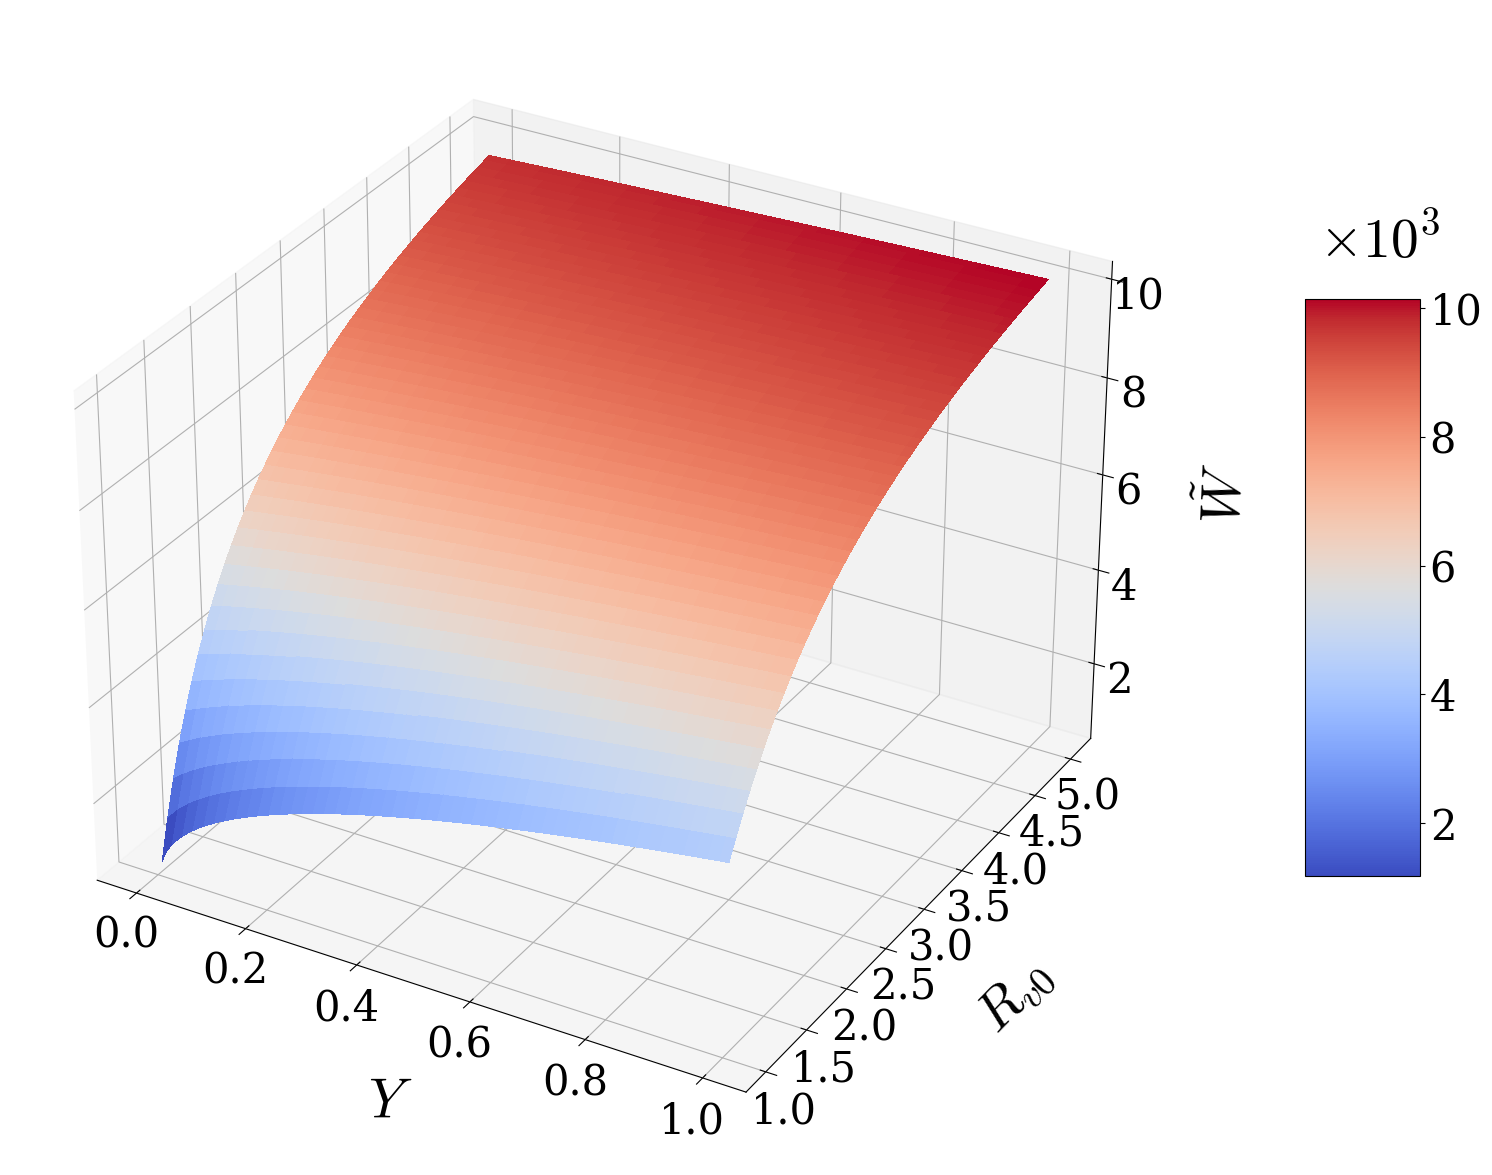

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

E_values = np.linspace(0, 1, 200)
R0_values = np.linspace(1.05, 5, 200)
E_values, R0_values = np.meshgrid(E_values, R0_values)

W_values_ = fs.W_r0_E(Rv0 = R0_values, E  = E_values,a  = a, m = m, d = d, p = p, T0 = T0_value)

fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')

surf = ax.plot_surface( E_values , R0_values, W_values_/1000 , cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

ax.zaxis.set_major_formatter('{x:.00f}')

ax.set_xlabel("\n" + r'$Y$', fontsize=40, loc = "left",linespacing=3)
ax.set_ylabel("\n" + r'$R_{v0}$' , fontsize=40, loc = "bottom",linespacing=3)
ax.set_zlabel("\n" + r'$\tilde{W}$', fontsize=40,labelpad=20)

cbar = fig.colorbar(surf, shrink=0.5, aspect=5,pad=0.09)
cbar.ax.text(0.5, 1.05, r'  $\times 10^{3}$', fontsize=40, ha='center', va='bottom', transform=cbar.ax.transAxes)


fig.savefig(r'{}fig_3d_W_vs_Y_vs_R0.png'.format(conf.ruta_escritura))


<ipython-input-15-85cf54db90c7>:18: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surf = ax.contourf( E_values , R0_values, W_values_/1000, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)


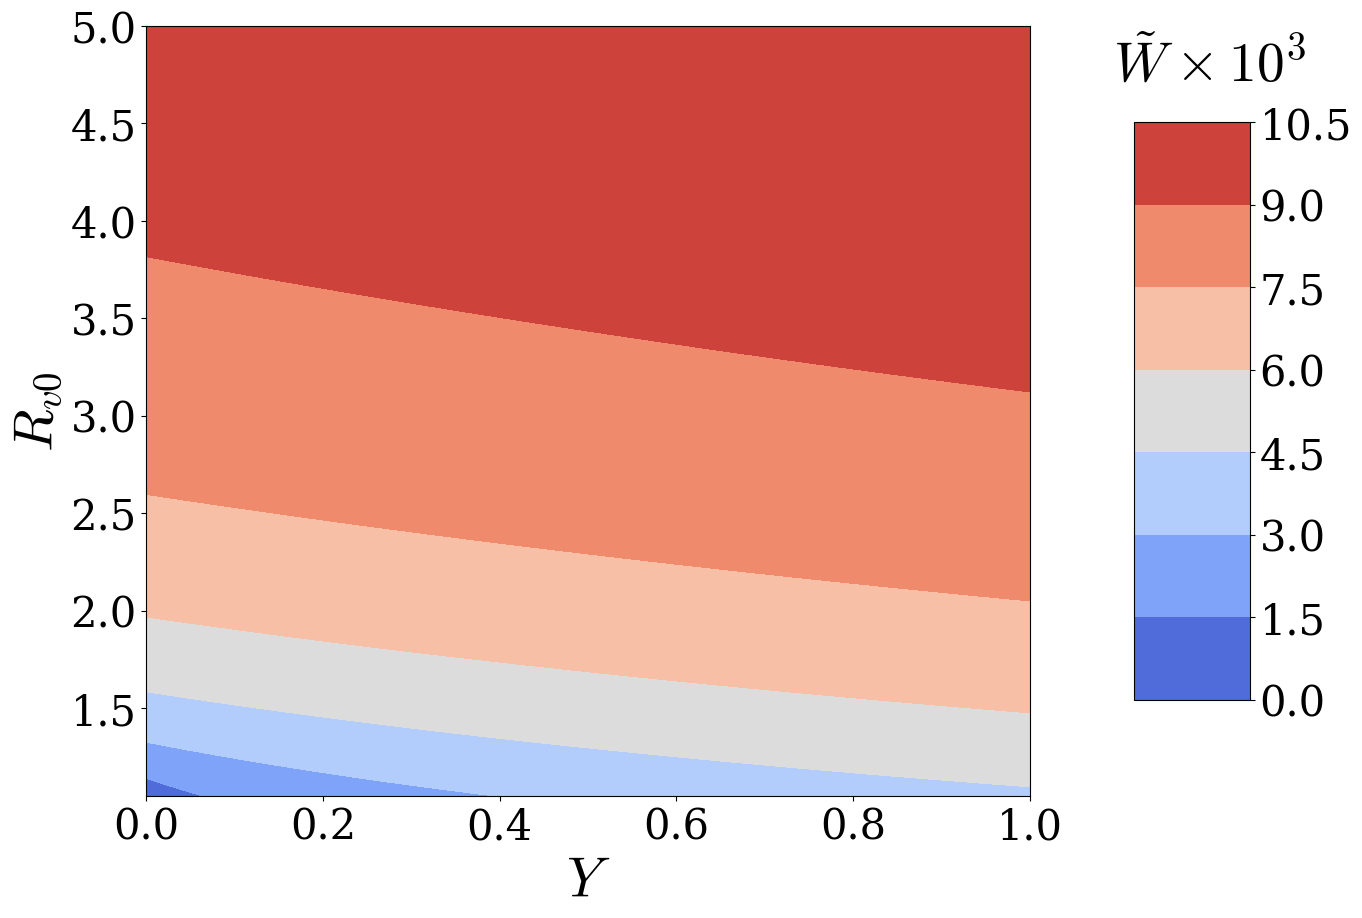

In [ ]:

plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', family='serif')
plt.rc('xtick', labelsize=30)
plt.rc('ytick', labelsize=30)

E_values = np.linspace(0, 1, 200)
R0_values = np.linspace(1.05, 5, 200)
E_values, R0_values = np.meshgrid(E_values, R0_values)

W_values_ = fs.W_r0_E(Rv0 = R0_values, E  = E_values,a  = a, m = m, d = d, p = p, T0 = T0_value)

fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)

surf = ax.contourf( E_values , R0_values, W_values_/1000, cmap=plt.cm.coolwarm,linewidth=0, antialiased=False)

ax.set_xlabel(r'$Y$', fontsize=40)
ax.set_ylabel(r'$R_{v0}$' , fontsize=40)

cbar = fig.colorbar(surf, shrink=0.75, aspect=5,pad=0.09)
cbar.ax.text(0.5, 1.05, r'  $\tilde{W} \times 10^{3}$', fontsize=40, ha='center', va='bottom', transform=cbar.ax.transAxes)

fig.savefig(r'{}fig_contour_W_vs_Y_vs_R0.png'.format(conf.ruta_escritura))